<a href="https://colab.research.google.com/github/veterydaisy/TelecomX_LATAM_daisy/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Telecom X - Análisis de Evasión de Clientes**

##**Descripción del Problema**

<div align="justify">Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.</div>

<div align="justify">Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.</div>

#📌 Extracción

In [83]:
#usamos requests porque lo estamos extrayendo directamente de una API

import requests
import pandas as pd
url = ('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')
response = requests.get(url)
data = response.json()

df  = pd.DataFrame(data)
print(df.head())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

##**Conociendo el conjunto de datos**

###**Explorando las columnas del dataset y verificando sus tipos de datos.**

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


###**Consultar el diccionario para comprender mejor el significado de las variables.**

**Diccionario de datos**

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

#🔧 Transformación

**Acciones más comunes a realizar**

+ Duplicados
+ Valores Vacíos
+ Valores nulos
+ Tipos de datos
+ Valores atípicos
+ Consistencia y validez de datos categóricos
+ Normalización de textos

###**Normalización del DataFrame**

In [85]:
df_normalizado = pd.json_normalize(data)
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [86]:
df_normalizado.head(50)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.8
8,0015-UOCOJ,No,Female,1,No,No,7,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35
9,0016-QLJIS,No,Female,0,Yes,Yes,65,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.9


###**Verificar si hay valores únicos en cada columna**

In [87]:

for col in df_normalizado.columns:
  print(f"valores únicos en la columna'{col}': {df_normalizado[col].nunique()}")
  if df_normalizado[col].nunique() < 50: #imprima los valores solamente si no hay muchos
    print(df_normalizado[col].unique())
    print('-' * 50) #linea divisoria para mejorar visualización

valores únicos en la columna'customerID': 7267
valores únicos en la columna'Churn': 3
['No' 'Yes' '']
--------------------------------------------------
valores únicos en la columna'customer.gender': 2
['Female' 'Male']
--------------------------------------------------
valores únicos en la columna'customer.SeniorCitizen': 2
[0 1]
--------------------------------------------------
valores únicos en la columna'customer.Partner': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'customer.Dependents': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'customer.tenure': 73
valores únicos en la columna'phone.PhoneService': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'phone.MultipleLines': 3
['No' 'Yes' 'No phone service']
--------------------------------------------------
valores únicos en la columna'internet.InternetService': 3
['DSL' 'Fiber optic' 'No'

###**Verificar si existen valores duplicados y nulos**

In [88]:
# Verificando si hay duplicados
duplicados = df_normalizado.duplicated().sum()
print(f"Número de duplicados: {duplicados}")

#verificamos si hay valores Nulos
#es .values para que nos entregue un numero y no nos entregue un objeto
valores_nulos = df_normalizado.isnull().values.sum()
print(f"\nValores nuos por comlumna: ")
print(valores_nulos[valores_nulos > 0])

Número de duplicados: 0

Valores nuos por comlumna: 
[]


###**Verificar si existen valres vacíos o en blanco**

In [89]:
#verificando valores vacios o en blanco
valores_en_blanco_o_vacio = df_normalizado.apply(lambda x: x.astype(str).str.strip() == '').sum()
print("\nValores en blanco o vecíos por columna:")
print(valores_en_blanco_o_vacio[valores_en_blanco_o_vacio > 0])


Valores en blanco o vecíos por columna:
Churn                    224
account.Charges.Total     11
dtype: int64


Contamos la cantidad de celdas vacías en el DataFrame, después de convertir todas las columnas a tipo string y eliminar espacios en blanco al principio y al final de cada valor.

In [90]:
df_normalizado.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


###**Transformar la columna account.Charges.Total a float**

In [91]:
#cambiando la columna account.Charges.Total  a Float
df_normalizado['account.Charges.Total'] = pd.to_numeric(df_normalizado['account.Charges.Total'], errors='coerce')
print(df_normalizado['account.Charges.Total'].dtype)

float64


###**Eliminación en la columna Churn**

Despues de analizar la cantidad de datos vacios de la columna Churn, se llego a la conclusion que estos no perjudicaban el resultado final si se eliminaban. Ya que, el data frame es bastante grande, con 7267 entradas. Y los 224 valores vacíos de Churn, solo representan el 3.08% del DataFrame

In [92]:
#eliminamos las columnas vacias de Churn ya que no es un dato que perjudique  el resultado final
df_normalizado = df_normalizado[df_normalizado['Churn'].str.strip() != '']
print('Número de filas desppués de eliminar las vacias en "Churn":',len(df_normalizado))

Número de filas desppués de eliminar las vacias en "Churn": 7043


In [93]:
#Vacios o en blanco
df_normalizado.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


###**Resumen estadístico de las columnas numéricas del DataFrame.**

In [94]:
df_normalizado.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


###**Creación de la columna cuentas_diarias**

In [95]:
#Creando la columna cuentas diarias
df_normalizado['Cuentas_Diarias'] = df_normalizado['account.Charges.Monthly'] / 30
print(df_normalizado[['account.Charges.Monthly','Cuentas_Diarias']])

      account.Charges.Monthly  Cuentas_Diarias
0                       65.60         2.186667
1                       59.90         1.996667
2                       73.90         2.463333
3                       98.00         3.266667
4                       83.90         2.796667
...                       ...              ...
7262                    55.15         1.838333
7263                    85.10         2.836667
7264                    50.30         1.676667
7265                    67.85         2.261667
7266                    59.00         1.966667

[7043 rows x 2 columns]


In [96]:
#eliminando los dos NaN del final
df_normalizado = df_normalizado.drop('Cuentas_Diarias', errors='ignore')

In [97]:
df_normalizado

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


###**Normalizando el DataFrame**

Este paso se realizó, para tener una mejor comprensión al momento de crear las gráficas y analizar los datos. Para ello, se realizaron las siguientes acciones:
- Renonbrar las columnas al español
- Los nombres de las columnas se transformaron a minusculas
- Se tradujeron todas las variables al español.
- Receteo de Index, para que sea correlativo luego de eliminar las filas de la columna Churn.

In [98]:
# Renombrar las columnas
nuevos_nombres = {'customerID': 'ClienteID','Churn': 'Evadio','customer.gender': 'Genero', 'customer.SeniorCitizen': 'Adulto mayor', 'customer.Partner':'Tiene Pareja', 'customer.Dependents':'Tiene dependientes',
                  'customer.tenure':'Meses de contrato', 'phone.PhoneService':'Servicio telefonico', 'phone.MultipleLines':'Multilineas', 'internet.InternetService':'Servicio Internet',
                  'internet.OnlineSecurity':'Seguridad en linea', 'internet.OnlineBackup':'Respaldo en linea', 'internet.DeviceProtection':'Proteccion de dispositivos',
                  'internet.TechSupport':'Soporte tecnico', 'internet.StreamingTV':'Television por streaming','internet.StreamingMovies':'Suscripcion peliculas','account.Contract':'Tipo de Contrato',
                  'account.PaperlessBilling':'Factura online', 'account.PaymentMethod':'Metodo de pago', 'account.Charges.Monthly':'Total del mes',
                  'account.Charges.Total':'Total cliente'}
df_normalizado = df_normalizado.rename(columns=nuevos_nombres)

# Imprimir el DataFrame con los nuevos nombres de las columnas
df_normalizado.columns


Index(['ClienteID', 'Evadio', 'Genero', 'Adulto mayor', 'Tiene Pareja',
       'Tiene dependientes', 'Meses de contrato', 'Servicio telefonico',
       'Multilineas', 'Servicio Internet', 'Seguridad en linea',
       'Respaldo en linea', 'Proteccion de dispositivos', 'Soporte tecnico',
       'Television por streaming', 'Suscripcion peliculas', 'Tipo de Contrato',
       'Factura online', 'Metodo de pago', 'Total del mes', 'Total cliente',
       'Cuentas_Diarias'],
      dtype='object')

In [99]:
df_normalizado.shape

(7043, 22)

In [100]:
#columnas en minusculas
df_normalizado.columns = df_normalizado.columns.str.lower()
df_normalizado.columns

Index(['clienteid', 'evadio', 'genero', 'adulto mayor', 'tiene pareja',
       'tiene dependientes', 'meses de contrato', 'servicio telefonico',
       'multilineas', 'servicio internet', 'seguridad en linea',
       'respaldo en linea', 'proteccion de dispositivos', 'soporte tecnico',
       'television por streaming', 'suscripcion peliculas', 'tipo de contrato',
       'factura online', 'metodo de pago', 'total del mes', 'total cliente',
       'cuentas_diarias'],
      dtype='object')

In [101]:
#traduciendo al español la columna genero (gender)
# Reemplazar los valores
df_normalizado['genero'] = df_normalizado['genero'].replace({'Male': 'Hombre', 'Female': 'Mujer'})

# Imprimir el DataFrame para verificar
print(df_normalizado['genero'].unique())

['Mujer' 'Hombre']


In [102]:
#traduciendo al español las celdas de la columna evadio (churn)
df_normalizado['evadio'] = df_normalizado['evadio'].replace({'Yes': 'Si'})
#traducendo las celdas de la columna tiene pareja
df_normalizado['tiene pareja'] = df_normalizado['tiene pareja'].replace({'Yes': 'Si'})
#traduciendo las celdas de la columna tiene dependientes
df_normalizado['tiene dependientes'] = df_normalizado['tiene dependientes'].replace({'Yes': 'Si'})
#traduciendo las celdas de la columna servicio telefonico
df_normalizado['servicio telefonico'] = df_normalizado['servicio telefonico'].replace({'Yes': 'Si'})
#traduciendo las celdas de la columna multilineas
df_normalizado['multilineas'] = df_normalizado['multilineas'].replace({'Yes': 'Si','No phone service':'Sin servicio telefonico'})
#traduciendo las celdas de la columna servicio internet
df_normalizado['servicio internet'] = df_normalizado['servicio internet'].replace({'Fiber optic': 'Fibra optica'})
#traduciendo las celdas de la columna seguridad en linea
df_normalizado['seguridad en linea'] = df_normalizado['seguridad en linea'].replace({'Yes': 'Si','No internet service':'Sin servicio de internet'})
#traduciendo las celdas de la columna respaldo en linea
df_normalizado['respaldo en linea'] = df_normalizado['respaldo en linea'].replace({'Yes': 'Si','No internet service':'Sin servicio de internet'})
#traduciendo las celdas de la columna proteccion de dispositivo
df_normalizado['proteccion de dispositivos'] = df_normalizado['proteccion de dispositivos'].replace({'Yes': 'Si','No internet service':'Sin servicio de internet'})
#traduciendo las celdas de la columna soporte tecnico
df_normalizado['soporte tecnico'] = df_normalizado['soporte tecnico'].replace({'Yes': 'Si','No internet service':'Sin servicio de internet'})
#traduciendo las celdas de la columna television por Streaming
df_normalizado['television por streaming'] = df_normalizado['television por streaming'].replace({'Yes': 'Si','No internet service':'Sin servicio de internet'})
#traduciendo las celdas de la columna suscripcion de peliculas
df_normalizado['suscripcion peliculas'] = df_normalizado['suscripcion peliculas'].replace({'Yes': 'Si','No internet service':'Sin servicio de internet'})
#traduciendo las celdas de la columna tipo de contrato
df_normalizado['tipo de contrato'] = df_normalizado['tipo de contrato'].replace({'Month-to-month': 'Mensual','One year': 'Anual','Two year': 'Dos años'})
#traduciendo la sceldas de la columna factura online
df_normalizado['factura online'] = df_normalizado['factura online'].replace({'Yes': 'Si'})
#traduciendo las celdas de la columna metodo  de pago
df_normalizado['metodo de pago'] = df_normalizado['metodo de pago'].replace({'Electronic check': 'Cheque electronico','Mailed check': 'Cheque por correo','Bank transfer (automatic)': 'Transferencia bancaria (automatico)','Credit card (automatic)': 'Tarjeta de credito (automatico)'})

In [103]:
#receteando en index
df_normalizado.reset_index(inplace=True, drop=True)
df_normalizado

,clienteid,evadio,genero,adulto mayor,tiene pareja,tiene dependientes,meses de contrato,servicio telefonico,multilineas,servicio internet,...,proteccion de dispositivos,soporte tecnico,television por streaming,suscripcion peliculas,tipo de contrato,factura online,metodo de pago,total del mes,total cliente,cuentas_diarias
0,0002-ORFBO,No,Mujer,0,Si,Si,9,Si,No,DSL,...,No,Si,Si,No,Anual,Si,Cheque por correo,65.60,593.30,2.186667
1,0003-MKNFE,No,Hombre,0,No,No,9,Si,Si,DSL,...,No,No,No,Si,Mensual,No,Cheque por correo,59.90,542.40,1.996667
2,0004-TLHLJ,Si,Hombre,0,No,No,4,Si,No,Fibra optica,...,Si,No,No,No,Mensual,Si,Cheque electronico,73.90,280.85,2.463333
3,0011-IGKFF,Si,Hombre,1,Si,No,13,Si,No,Fibra optica,...,Si,No,Si,Si,Mensual,Si,Cheque electronico,98.00,1237.85,3.266667
4,0013-EXCHZ,Si,Mujer,1,Si,No,3,Si,No,Fibra optica,...,No,Si,Si,No,Mensual,Si,Cheque por correo,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,No,Mujer,0,No,No,13,Si,No,DSL,...,No,Si,No,No,Anual,No,Cheque por correo,55.15,742.90,1.838333
7039,9992-RRAMN,Si,Hombre,0,Si,No,22,Si,Si,Fibra optica,...,No,No,No,Si,Mensual,Si,Cheque electronico,85.10,1873.70,2.836667
7040,9992-UJOEL,No,Hombre,0,No,No,2,Si,No,DSL,...,No,No,No,No,Mensual,Si,Cheque por correo,50.30,92.75,1.676667
7041,9993-LHIEB,No,Hombre,0,Si,Si,67,Si,No,DSL,...,Si,Si,No,Si,Dos años,No,Cheque por correo,67.85,4627.65,2.261667


In [104]:
df_normalizado.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   clienteid                   7043 non-null   object 
 1   evadio                      7043 non-null   object 
 2   genero                      7043 non-null   object 
 3   adulto mayor                7043 non-null   int64  
 4   tiene pareja                7043 non-null   object 
 5   tiene dependientes          7043 non-null   object 
 6   meses de contrato           7043 non-null   int64  
 7   servicio telefonico         7043 non-null   object 
 8   multilineas                 7043 non-null   object 
 9   servicio internet           7043 non-null   object 
 10  seguridad en linea          7043 non-null   object 
 11  respaldo en linea           7043 non-null   object 
 12  proteccion de dispositivos  7043 non-null   object 
 13  soporte tecnico             7043 

###**Exportación de a base de datos**

In [194]:
df_normalizado.to_csv('datos_limpios.csv', index=False)

#📊 Carga y análisis

##**Análisis Descriptivo**

###**Resumen estadístico de las columnas numéricas del DataFrame.**

In [105]:
df_normalizado.describe()

,adulto mayor,meses de contrato,total del mes,total cliente,cuentas_diarias
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,2.158723
std,0.368612,24.559481,30.090047,2266.771362,1.003002
min,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.500000,401.450000,1.183333
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.850000,3794.737500,2.995000
max,1.000000,72.000000,118.750000,8684.800000,3.958333


##**Visualización de datos**

In [106]:
import plotly.express as px

In [107]:
import matplotlib.pyplot as plt

###**Número y porcentaje de clientes que abandonaron la Empresa**

In [108]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

cantidad_de_evasion = df_normalizado['evadio'].value_counts()
porcentaje_de_evasion = cantidad_de_evasion / len(df_normalizado) * 100

# creando los subplots: 1 celdas, 2 columans
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'bar'}, {'type':'domain'}]],
                    subplot_titles=('Cantidad Clientes Activos v/s Clientes que Abandonaron la Empresa ', 'Porcentaje de Clientes Activos v/s Clientes que Abandonaron la Empresa'))

# Agregando el gráfico de barras con recuentos y etiquetas de texto
fig.add_trace(go.Bar(x=cantidad_de_evasion.index, y=cantidad_de_evasion.values, text=cantidad_de_evasion.values, textposition='auto', marker_color=['#1f77b4', '#ff7f0e']), 1, 1)

# Agregando el gráfico circular con porcentajes
fig.add_trace(go.Pie(values=porcentaje_de_evasion.values, labels=porcentaje_de_evasion.index, hole=0.3), 1, 2)

# actualizando la disposición para una mejor apariencia
fig.update_layout( title={
                         'text': "Comparación de Distribución de Clientes por Estado de Evasión",
                         'x': 0.5,
                         'xanchor': 'center'})


fig.show()

###**Análisis de Evasión por Género:** distribución de evasión entre hombres y mujeres.


In [109]:
from ctypes import alignment
# Calcular cantidad y porcentajes por género y evasión
cantidad_evasion_por_genero = df_normalizado.groupby(['genero', 'evadio']).size().unstack(fill_value=0)
porcentaje_evasion_por_genero = cantidad_evasion_por_genero.apply(lambda x: x / x.sum() * 100, axis=1)

# Crear subplots: 1 filas, 2 columnas
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'bar'}, {'type':'bar'}]],
                    subplot_titles=('Cantidad de Clientes por Género y Estado de Evasión', 'Porcentaje de Clientes por Género y Estado de Evasión'))

# agregar el gráfico de barras con recuentos
colors=['blue','red']
for i, evadio_status in enumerate(cantidad_evasion_por_genero.columns):
    fig.add_trace(go.Bar(x=cantidad_evasion_por_genero.index, y=cantidad_evasion_por_genero[evadio_status], name=evadio_status, text=cantidad_evasion_por_genero[evadio_status], marker_color=colors[i], textposition='auto'), 1, 1)
colors=['blue','red']
# Agregar el gráfico de barras con porcentajes
for i, evadio_status in enumerate(porcentaje_evasion_por_genero.columns):
     fig.add_trace(go.Bar(x=porcentaje_evasion_por_genero.index, y=porcentaje_evasion_por_genero[evadio_status], name=evadio_status, text=porcentaje_evasion_por_genero[evadio_status].round(2), marker_color=colors[i], textposition='auto', showlegend=False), 1, 2) # showlegend=False para evitar duplicar la leyenda

# titulo general
fig.update_layout(barmode='group', title_text='Análisis de Evasión por Género: Cantidad y Porcentaje', title_x=0.5)


fig.show()

###**Análisis de Evasión por Edad (Adulto Mayor):** Comparar la tasa de evasión entre adultos mayores y otros clientes.


In [110]:
# Calcular cantidad y porcentaje por adulto mayor y evasión
cantidad_evasion_adulto_mayor = df_normalizado.groupby(['adulto mayor', 'evadio']).size().unstack(fill_value=0)
porcentaje_evasion_adulto_mayor = cantidad_evasion_adulto_mayor.apply(lambda x: x / x.sum() * 100, axis=1)

# Cambiar el nombre del índice para mayor claridad
cantidad_evasion_adulto_mayor.index = cantidad_evasion_adulto_mayor.index.map({0: 'Menor de 65 años', 1: 'Adulto Mayor'})
porcentaje_evasion_adulto_mayor.index = porcentaje_evasion_adulto_mayor.index.map({0: 'Menor de 65 años', 1: 'Adulto Mayor'})


#creacion de  subplots: 1 filas, 2 columnas
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'bar'}, {'type':'bar'}]],
                    subplot_titles=('Cantidad de Clientes por Adulto Mayor y Estado de Evasión', 'Porcentaje de Clientes por Adulto Mayor y Estado de Evasión'))

# Agregando el gráfico de barras con recuentos
colors=['#c5d4ab','#FCE8B8']
for i, evadio_status in enumerate(cantidad_evasion_adulto_mayor.columns):
    fig.add_trace(go.Bar(x=cantidad_evasion_adulto_mayor.index, y=cantidad_evasion_adulto_mayor[evadio_status], name=evadio_status, text=cantidad_evasion_adulto_mayor[evadio_status], marker_color=colors[i], textposition='auto'), 1, 1)

# agregando el grafico de barra con porcentajes y cambiando los colores
colors = ['#c5d4ab','#FCE8B8'] # Define color para 'No' y 'Si'
for i, evadio_status in enumerate(porcentaje_evasion_adulto_mayor.columns):
     fig.add_trace(go.Bar(x=porcentaje_evasion_adulto_mayor.index, y=porcentaje_evasion_adulto_mayor[evadio_status], name=evadio_status, text=porcentaje_evasion_adulto_mayor[evadio_status].round(2), textposition='auto', marker_color=colors[i], showlegend=False), 1, 2) # Use index 'i' to select color


# Update layout
fig.update_layout(barmode='group', title_text='Análisis de Evasión en Adultos Mayores de 65 Años: Cantidad y Porcentaje', title_x=0.5)


fig.show()

**NOTA** aca si hay una diferencia considerable , en los adultos mayores de 65 la tasa de evasiom es mas alta en el universo de datos

###**Análisis de Evasión por Relación (Pareja y Dependientes):** si tener pareja o dependientes influye en la evasión.

In [111]:
# Analizar evasión por tener pareja
cantidad_parejas_evasion = df_normalizado.groupby(['tiene pareja', 'evadio']).size().unstack(fill_value=0)
porcentaje_parejas_evasion = cantidad_parejas_evasion.apply(lambda x: x / x.sum() * 100, axis=1)

fig_parejas = make_subplots(rows=1, cols=2, specs=[[{'type':'bar'}, {'type':'bar'}]],
                    subplot_titles=('Cantidad de Clientes por Pareja y Estado de Evasión', 'Porcentaje de Clientes por Pareja y Estado de Evasión'))
colors = ['#00a86b','#e0b0ff']
for i, evadio_status in enumerate(cantidad_parejas_evasion.columns):
    fig_parejas.add_trace(go.Bar(x=cantidad_parejas_evasion.index, y=cantidad_parejas_evasion[evadio_status], name=evadio_status, text=cantidad_parejas_evasion[evadio_status], marker_color=colors[i], textposition='auto'), 1, 1)
colors = ['#00a86b','#e0b0ff']
for i, evadio_status in enumerate(porcentaje_parejas_evasion.columns):
     fig_parejas.add_trace(go.Bar(x=porcentaje_parejas_evasion.index, y=porcentaje_parejas_evasion[evadio_status], name=evadio_status, text=porcentaje_parejas_evasion[evadio_status].round(2), marker_color=colors[i], textposition='auto', showlegend=False), 1, 2)

fig_parejas.update_layout(barmode='group', title_text='Análisis de Evasión por Estado de Pareja: Cantidad y Porcentaje', title_x=0.5)

fig_parejas.show()

# Analizar evasión por tener dependientes
cantidad_dependientes_evasion = df_normalizado.groupby(['tiene dependientes', 'evadio']).size().unstack(fill_value=0)
porcentaje_dependientes_evasion = cantidad_dependientes_evasion.apply(lambda x: x / x.sum() * 100, axis=1)

fig_dependientes = make_subplots(rows=1, cols=2, specs=[[{'type':'bar'}, {'type':'bar'}]],
                    subplot_titles=('Cantidad de Clientes por Dependientes y Estado de Evasion', 'Porcentaje de Clientes por Dependientes y Estado de Evasion'))
colors = ['#00a86b','#e0b0ff']
for i, evadio_status in enumerate(cantidad_dependientes_evasion.columns):
    fig_dependientes.add_trace(go.Bar(x=cantidad_dependientes_evasion.index, y=cantidad_dependientes_evasion[evadio_status], name=evadio_status, text=cantidad_dependientes_evasion[evadio_status], marker_color=colors[i], textposition='auto'), 1, 1)

colors = ['#00a86b','#e0b0ff']
for i, evadio_status in enumerate(porcentaje_dependientes_evasion.columns):
     fig_dependientes.add_trace(go.Bar(x=porcentaje_dependientes_evasion.index, y=porcentaje_dependientes_evasion[evadio_status], name=evadio_status, text=porcentaje_dependientes_evasion[evadio_status].round(2),  marker_color=colors[i], textposition='auto', showlegend=False), 1, 2)

fig_dependientes.update_layout(barmode='group', title_text='Análisis de Evasión por Dependientes: Cantidad y Porcentaje', title_x=0.5)

fig_dependientes.show()

###**Análisis de Evasión por Antigüedad (Meses de Contrato):** Cómo la duración del contrato se relaciona con la tasa de evasión.


In [112]:
#para ver en que periodo es mayor la tasa de evasión
px.histogram(df_normalizado, x='meses de contrato', text_auto=True, color='evadio', barmode= 'group')

**NOTA**las personas estan evadiendo mas en el primer mes , y va decayendo con el tiempo

In [113]:
#agrupar por meses de contrato y dejo la empresa
df_grouped =df_normalizado.groupby(['meses de contrato','evadio']).size().unstack(fill_value=0)

#calcular el % de 'dejo la empresa' por 'meses de contrato'
df_grouped['tasa_de_evasion'] = (df_grouped.get('Si',0)/df_grouped.sum(axis=1)) * 100

#mostrar el resultado
print(df_grouped[['tasa_de_evasion']])

evadio             tasa_de_evasion
meses de contrato                 
0                         0.000000
1                        61.990212
2                        51.680672
3                        47.000000
4                        47.159091
...                            ...
68                        9.000000
69                        8.421053
70                        9.243697
71                        3.529412
72                        1.657459

[73 rows x 1 columns]


In [114]:
#hacemos el grafico
fig = px.line(df_grouped.reset_index(),
              x='meses de contrato',
              y='tasa_de_evasion',
              markers=True,
              title='Tasa de abandono (%) por Meses de contrato')
fig.update_layout(title_x=0.5)
fig.show()

In [115]:
#vemos si ,meses de contrato por cargos mensuales tiene que ver con el abandono de la empresa
fig = px.scatter(df_normalizado,
           x='meses de contrato',
           y='total del mes',
           color='evadio',
           title='Meses de Contrato v/s cargos mensuales en el abandono de los clientes'
           )
fig.update_layout(title_x=0.5)
fig.show()

el valor de contrato aumento levemente a traves de los meses. se puede observa ruq eapaesar de que con el tiempo va aumentando el valor del servicio , esto no tiene que ver con el abandono de los clientes

###**Análisis de Evasión por Servicios Contratados:** Explorar la tasa de evasión para diferentes servicios (teléfono, internet, seguridad, etc.).

In [116]:
#servicio telefonico
# Calcular cantidad y porcentaje por servicio telefonia y evasión
cantidad_evasion_servicio_telefonia = df_normalizado.groupby(['servicio telefonico', 'evadio']).size().unstack(fill_value=0)
porcentaje_evasion_servicio_telefonia = cantidad_evasion_servicio_telefonia.apply(lambda x: x / x.sum() * 100, axis=1)


#creacion de  subplots: 1 filas, 2 columnas
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'bar'}, {'type':'bar'}]],
                    subplot_titles=('Cantidad de Clientes por servicio telefonico y Estado de Evasión', 'Porcentaje de Clientes por servicio telefonico y Estado de Evasión'))

# Agregando el gráfico de barras con recuentos
colors = ['#48a3a7', '#90EE90'] # Define color para 'No' y 'Si'
for i, evadio_status in enumerate(cantidad_evasion_servicio_telefonia.columns):
    fig.add_trace(go.Bar(x=cantidad_evasion_servicio_telefonia.index, y=cantidad_evasion_servicio_telefonia[evadio_status], name=evadio_status, text=cantidad_evasion_servicio_telefonia[evadio_status], marker_color=colors[i], textposition='auto'), 1, 1)

# agregando el grafico de barra con porcentajes y cambiando los colores
colors = ['#48a3a7', '#90EE90'] # Define color para 'No' y 'Si'
for i, evadio_status in enumerate(porcentaje_evasion_servicio_telefonia.columns):
     fig.add_trace(go.Bar(x=porcentaje_evasion_servicio_telefonia.index, y=porcentaje_evasion_servicio_telefonia[evadio_status], name=evadio_status, text=porcentaje_evasion_servicio_telefonia[evadio_status].round(2), textposition='auto', marker_color=colors[i], showlegend=False), 1, 2) # Use index 'i' to select color


# Update layout
fig.update_layout(barmode='group', title_text='Análisis de Evasión en Clientes v/s Servicio Telefonico: Cantidad y Porcentaje', title_x=0.5)


fig.show()

In [117]:
#multilineas

# Calcular cantidad y porcentaje por servicio multilineas
cantidad_evasion_multilineas = df_normalizado.groupby(['multilineas', 'evadio']).size().unstack(fill_value=0)
porcentaje_evasion_multilineas = cantidad_evasion_multilineas.apply(lambda x: x / x.sum() * 100, axis=1)


#creacion de  subplots: 1 filas, 2 columnas
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'bar'}, {'type':'bar'}]],
                    subplot_titles=('Cantidad de Clientes con Multilineas y Estado de Evasión', 'Porcentaje de Clientes con Multilineas y Estado de Evasión'))

# Agregando el gráfico de barras con recuentos
colors = ['#48a3a7', '#90EE90'] # Define color para 'No' y 'Si'
for i, evadio_status in enumerate(cantidad_evasion_multilineas.columns):
    fig.add_trace(go.Bar(x=cantidad_evasion_multilineas.index, y=cantidad_evasion_multilineas[evadio_status], name=evadio_status, text=cantidad_evasion_multilineas[evadio_status], marker_color=colors[i], textposition='auto'), 1, 1)

# agregando el grafico de barra con porcentajes y cambiando los colores
colors = ['#48a3a7', '#90EE90'] # Define color para 'No' y 'Si'
for i, evadio_status in enumerate(porcentaje_evasion_multilineas.columns):
     fig.add_trace(go.Bar(x=porcentaje_evasion_multilineas.index, y=porcentaje_evasion_multilineas[evadio_status], name=evadio_status, text=porcentaje_evasion_multilineas[evadio_status].round(2), textposition='auto', marker_color=colors[i], showlegend=False), 1, 2) # Use index 'i' to select color


# Update layout
fig.update_layout(barmode='group', title_text='Análisis de Evasión en Clientes v/s Multilineas: Cantidad y Porcentaje', title_x=0.5)


fig.show()

In [118]:
#servicio de internet
# Calcular cantidad y porcentaje por servicio de internet y evasión
cantidad_evasion_servicio_internet = df_normalizado.groupby(['servicio internet', 'evadio']).size().unstack(fill_value=0)
porcentaje_evasion_servicio_internet = cantidad_evasion_servicio_internet.apply(lambda x: x / x.sum() * 100, axis=1)


#creacion de  subplots: 1 filas, 2 columnas
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'bar'}, {'type':'bar'}]],
                    subplot_titles=('Servicio de Internet y Estado de Evasión en Números', 'Servicio de Internet y Estado de Evasión en Porcentaje'))

# Agregando el gráfico de barras con recuentos
colors = ['#48a3a7', '#90EE90'] # Define color para 'No' y 'Si'
for i, evadio_status in enumerate(cantidad_evasion_servicio_internet.columns):
    fig.add_trace(go.Bar(x=cantidad_evasion_servicio_internet.index, y=cantidad_evasion_servicio_internet[evadio_status], name=evadio_status, text=cantidad_evasion_servicio_internet[evadio_status], marker_color=colors[i], textposition='auto'), 1, 1)

# agregando el grafico de barra con porcentajes y cambiando los colores
colors = ['#48a3a7', '#90EE90'] # Define color para 'No' y 'Si'
for i, evadio_status in enumerate(porcentaje_evasion_servicio_internet.columns):
     fig.add_trace(go.Bar(x=porcentaje_evasion_servicio_internet.index, y=porcentaje_evasion_servicio_internet[evadio_status], name=evadio_status, text=porcentaje_evasion_servicio_internet[evadio_status].round(2), textposition='auto', marker_color=colors[i], showlegend=False), 1, 2) # Use index 'i' to select color


# Update layout
fig.update_layout(barmode='group', title_text='Análisis de Evasión en Clientes v/s Servicio de Internet: Cantidad y Porcentaje', title_x=0.5)


fig.show()

**si** bien la fibra es reciente , quizas dsl se mantiena al ser mas estable en algunos lugares. ya que la firba es mas fragil (averiguar esto ) y por tato quiza menos estable, tambine va en los valores al contratar fifra , la regionalidad , etc.
ver si clientes que abandonana fibra sonantiguos o nuevos

In [119]:
#vemos si ,clientes que abandonan fibra son antguos o nuevos
fig = px.histogram(df_normalizado,
                   x='meses de contrato',
                   color='evadio',
                   facet_col='servicio internet',
                   title='Distribución de Meses de Contrato por Servicio de Internet y Abandono',
                   barmode='group')
fig.update_layout(title_x=0.5)
fig.show()

In [120]:
#seguridad en linea

# Calcular cantidad y porcentaje de seguridad en linea y evasión
cantidad_evacion_seguridad_en_linea = df_normalizado.groupby(['seguridad en linea', 'evadio']).size().unstack(fill_value=0)
porcentaje_evasion_seguridad_en_linea = cantidad_evacion_seguridad_en_linea.apply(lambda x: x / x.sum() * 100, axis=1)


#creacion de  subplots: 1 filas, 2 columnas
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'bar'}, {'type':'bar'}]],
                    subplot_titles=('Seguridad en Linea y Estado de Evasión en Números', 'Seguridad en Linea y Estado de Evasión en Porcentaje'))

# Agregando el gráfico de barras con recuentos
colors = ['#48a3a7', '#90EE90'] # Define color para 'No' y 'Si'
for i, evadio_status in enumerate(cantidad_evacion_seguridad_en_linea.columns):
    fig.add_trace(go.Bar(x=cantidad_evacion_seguridad_en_linea.index, y=cantidad_evacion_seguridad_en_linea[evadio_status], name=evadio_status, text=cantidad_evacion_seguridad_en_linea[evadio_status], marker_color=colors[i], textposition='auto'), 1, 1)

# agregando el grafico de barra con porcentajes y cambiando los colores
colors = ['#48a3a7', '#90EE90'] # Define color para 'No' y 'Si'
for i, evadio_status in enumerate(porcentaje_evasion_seguridad_en_linea.columns):
     fig.add_trace(go.Bar(x=porcentaje_evasion_seguridad_en_linea.index, y=porcentaje_evasion_seguridad_en_linea[evadio_status], name=evadio_status, text=porcentaje_evasion_seguridad_en_linea[evadio_status].round(2), textposition='auto', marker_color=colors[i], showlegend=False), 1, 2) # Use index 'i' to select color


# Update layout
fig.update_layout(barmode='group', title_text='Análisis de Evasión en Clientes v/s Seguridad en Linea: Cantidad y Porcentaje', title_x=0.5)


fig.show()

In [121]:
#respaldo en linea

# Calcular cantidad y porcentaje por respaldo en linea
cantidad_evasion_respaldo_en_linea = df_normalizado.groupby(['respaldo en linea', 'evadio']).size().unstack(fill_value=0)
porcentaje_evasion_respaldo_en_linea = cantidad_evasion_respaldo_en_linea.apply(lambda x: x / x.sum() * 100, axis=1)


#creacion de  subplots: 1 filas, 2 columnas
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'bar'}, {'type':'bar'}]],
                    subplot_titles=('Respaldo en Linea y Estado de Evasión en Números', 'Respaldo en Linea y Estado de Evasión en Porcentaje'))

# Agregando el gráfico de barras con recuentos
colors = ['#48a3a7', '#90EE90'] # Define color para 'No' y 'Si'
for i, evadio_status in enumerate(cantidad_evasion_respaldo_en_linea.columns):
    fig.add_trace(go.Bar(x=cantidad_evasion_respaldo_en_linea.index, y=cantidad_evasion_respaldo_en_linea[evadio_status], name=evadio_status, text=cantidad_evasion_respaldo_en_linea[evadio_status], marker_color=colors[i], textposition='auto'), 1, 1)

# agregando el grafico de barra con porcentajes y cambiando los colores
colors = ['#48a3a7', '#90EE90'] # Define color para 'No' y 'Si'
for i, evadio_status in enumerate(porcentaje_evasion_respaldo_en_linea.columns):
     fig.add_trace(go.Bar(x=porcentaje_evasion_respaldo_en_linea.index, y=porcentaje_evasion_respaldo_en_linea[evadio_status], name=evadio_status, text=porcentaje_evasion_respaldo_en_linea[evadio_status].round(2), textposition='auto', marker_color=colors[i], showlegend=False), 1, 2) # Use index 'i' to select color


# Update layout
fig.update_layout(barmode='group', title_text='Análisis de Evasión en Clientes v/s Respaldo en Linea: Cantidad y Porcentaje', title_x=0.5)


fig.show()

In [122]:
#proteccion de dispositivos

# Calcular cantidad y porcentaje por proteccion de dispositivos
cantidad_evasion_respaldo_dispositivos = df_normalizado.groupby(['proteccion de dispositivos', 'evadio']).size().unstack(fill_value=0)
porcentaje_evasion_respaldo_dispositivos = cantidad_evasion_respaldo_dispositivos.apply(lambda x: x / x.sum() * 100, axis=1)


#creacion de  subplots: 1 filas, 2 columnas
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'bar'}, {'type':'bar'}]],
                    subplot_titles=('Respaldo Dispositivos y Estado de Evasión en Números', 'Respaldo Dispositivos y Estado de Evasión en Porcentaje'))

# Agregando el gráfico de barras con recuentos
colors = ['orange', 'purple'] # Define color para 'No' y 'Si'
for i, evadio_status in enumerate(cantidad_evasion_respaldo_dispositivos.columns):
    fig.add_trace(go.Bar(x=cantidad_evasion_respaldo_dispositivos.index, y=cantidad_evasion_respaldo_dispositivos[evadio_status], name=evadio_status, text=cantidad_evasion_respaldo_dispositivos[evadio_status], marker_color=colors[i], textposition='auto'), 1, 1)

# agregando el grafico de barra con porcentajes y cambiando los colores
colors = ['orange', 'purple'] # Define color para 'No' y 'Si'
for i, evadio_status in enumerate(porcentaje_evasion_respaldo_dispositivos.columns):
     fig.add_trace(go.Bar(x=porcentaje_evasion_respaldo_dispositivos.index, y=porcentaje_evasion_respaldo_dispositivos[evadio_status], name=evadio_status, text=porcentaje_evasion_respaldo_dispositivos[evadio_status].round(2), textposition='auto', marker_color=colors[i], showlegend=False), 1, 2) # Use index 'i' to select color


# Update layout
fig.update_layout(barmode='group', title_text='Análisis de Evasión en Clientes v/s Respaldo Dispositivos: Cantidad y Porcentaje', title_x=0.5)


fig.show()

In [123]:
#soporte tecnico

# Calcular cantidad y porcentaje por soporte tecnico
cantidad_evasion_soporte_tecnico = df_normalizado.groupby(['soporte tecnico', 'evadio']).size().unstack(fill_value=0)
porcentaje_evasion_soporte_tecnico = cantidad_evasion_soporte_tecnico.apply(lambda x: x / x.sum() * 100, axis=1)


#creacion de  subplots: 1 filas, 2 columnas
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'bar'}, {'type':'bar'}]],
                    subplot_titles=('Soporte Técnico y Estado de Evasión en Números', 'Soporte Técnico y Estado de Evasión en Porcentaje'))

# Agregando el gráfico de barras con recuentos
colors = ['blue', 'grey'] # Define color para 'No' y 'Si'
for i, evadio_status in enumerate(cantidad_evasion_soporte_tecnico.columns):
    fig.add_trace(go.Bar(x=cantidad_evasion_soporte_tecnico.index, y=cantidad_evasion_soporte_tecnico[evadio_status], name=evadio_status, text=cantidad_evasion_soporte_tecnico[evadio_status], marker_color=colors[i], textposition='auto'), 1, 1)

# agregando el grafico de barra con porcentajes y cambiando los colores
colors = ['blue', 'grey'] # Define color para 'No' y 'Si'
for i, evadio_status in enumerate(porcentaje_evasion_soporte_tecnico.columns):
     fig.add_trace(go.Bar(x=porcentaje_evasion_soporte_tecnico.index, y=porcentaje_evasion_soporte_tecnico[evadio_status], name=evadio_status, text=porcentaje_evasion_soporte_tecnico[evadio_status].round(2), textposition='auto', marker_color=colors[i], showlegend=False), 1, 2) # Use index 'i' to select color


# Update layout
fig.update_layout(barmode='group', title_text='Análisis de Evasión en Clientes v/s Soporte Técnico: Cantidad y Porcentaje', title_x=0.5)


fig.show()

In [124]:
#tv streaming


# Calcular cantidad y porcentaje por television por streaming
cantidad_evasion_tvstreaming = df_normalizado.groupby(['television por streaming', 'evadio']).size().unstack(fill_value=0)
porcentaje_evasion_tvstreaming = cantidad_evasion_tvstreaming.apply(lambda x: x / x.sum() * 100, axis=1)


#creacion de  subplots: 1 filas, 2 columnas
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'bar'}, {'type':'bar'}]],
                    subplot_titles=('Soporte television por streaming y Estado de Evasión en Números', 'Soporte television por streaming y Estado de Evasión en Porcentaje'))

# Agregando el gráfico de barras con recuentos
colors = ['lightgrey', 'purple'] # Define color para 'No' y 'Si'
for i, evadio_status in enumerate(cantidad_evasion_tvstreaming.columns):
    fig.add_trace(go.Bar(x=cantidad_evasion_tvstreaming.index, y=cantidad_evasion_tvstreaming[evadio_status], name=evadio_status, text=cantidad_evasion_tvstreaming[evadio_status], marker_color=colors[i], textposition='auto'), 1, 1)

# agregando el grafico de barra con porcentajes y cambiando los colores
colors = ['lightgrey', 'purple'] # Define color para 'No' y 'Si'
for i, evadio_status in enumerate(porcentaje_evasion_tvstreaming.columns):
     fig.add_trace(go.Bar(x=porcentaje_evasion_tvstreaming.index, y=porcentaje_evasion_tvstreaming[evadio_status], name=evadio_status, text=porcentaje_evasion_tvstreaming[evadio_status].round(2), textposition='auto', marker_color=colors[i], showlegend=False), 1, 2) # Use index 'i' to select color


# Update layout
fig.update_layout(barmode='group', title_text='Análisis de Evasión en Clientes v/s Soporte television por streaming: Cantidad y Porcentaje', title_x=0.5)


fig.show()

In [125]:
#'suscripcion peliculas

# Calcular cantidad y porcentaje por suscripcion peliculas
cantidad_evasion_suscripcion_peliculas = df_normalizado.groupby(['suscripcion peliculas', 'evadio']).size().unstack(fill_value=0)
porcentaje_evasion_suscripcion_peliculas = cantidad_evasion_suscripcion_peliculas.apply(lambda x: x / x.sum() * 100, axis=1)


#creacion de  subplots: 1 filas, 2 columnas
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'bar'}, {'type':'bar'}]],
                    subplot_titles=('Suscripción Peliculas y Estado de Evasión en Números', 'Suscripción Peliculas y Estado de Evasión en Porcentaje'))

# Agregando el gráfico de barras con recuentos
colors = ['lightgrey', 'purple'] # Define color para 'No' y 'Si'
for i, evadio_status in enumerate(cantidad_evasion_suscripcion_peliculas.columns):
    fig.add_trace(go.Bar(x=cantidad_evasion_suscripcion_peliculas.index, y=cantidad_evasion_suscripcion_peliculas[evadio_status], name=evadio_status, text=cantidad_evasion_suscripcion_peliculas[evadio_status], marker_color=colors[i], textposition='auto'), 1, 1)

# agregando el grafico de barra con porcentajes y cambiando los colores
colors = ['lightgrey', 'purple'] # Define color para 'No' y 'Si'
for i, evadio_status in enumerate(porcentaje_evasion_suscripcion_peliculas.columns):
     fig.add_trace(go.Bar(x=porcentaje_evasion_suscripcion_peliculas.index, y=porcentaje_evasion_suscripcion_peliculas[evadio_status], name=evadio_status, text=porcentaje_evasion_suscripcion_peliculas[evadio_status].round(2), textposition='auto', marker_color=colors[i], showlegend=False), 1, 2) # Use index 'i' to select color


# Update layout
fig.update_layout(barmode='group', title_text='Análisis de Evasión en Clientes v/s Suscripción Peliculas: Cantidad y Porcentaje', title_x=0.5)


fig.show()

###**Análisis de evasión por tipo de contrato:** La tasa de evasión entre los diferentes tipos de contrato.


In [126]:
#tipo de contrato


# Calcular cantidad y porcentaje por tipo de contrato
cantidad_evasion_tipo_cotrato = df_normalizado.groupby(['tipo de contrato', 'evadio']).size().unstack(fill_value=0)
porcentaje_evasion_tipo_contrato = cantidad_evasion_tipo_cotrato.apply(lambda x: x / x.sum() * 100, axis=1)


#creacion de  subplots: 1 filas, 2 columnas
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'bar'}, {'type':'bar'}]],
                    subplot_titles=('Tipo de Contrato y Estado de Evasión en Números', 'Tipo de Contrato y Estado de Evasión en Porcentaje'))

# Agregando el gráfico de barras con recuentos
colors = ['lightgreen', 'orange'] # Define color para 'No' y 'Si'
for i, evadio_status in enumerate(cantidad_evasion_tipo_cotrato.columns):
    fig.add_trace(go.Bar(x=cantidad_evasion_tipo_cotrato.index, y=cantidad_evasion_tipo_cotrato[evadio_status], name=evadio_status, text=cantidad_evasion_tipo_cotrato[evadio_status], marker_color=colors[i], textposition='auto'), 1, 1)

# agregando el grafico de barra con porcentajes y cambiando los colores
colors = ['lightgreen', 'orange'] # Define color para 'No' y 'Si'
for i, evadio_status in enumerate(porcentaje_evasion_tipo_contrato.columns):
     fig.add_trace(go.Bar(x=porcentaje_evasion_tipo_contrato.index, y=porcentaje_evasion_tipo_contrato[evadio_status], name=evadio_status, text=porcentaje_evasion_tipo_contrato[evadio_status].round(2), textposition='auto', marker_color=colors[i], showlegend=False), 1, 2) # Use index 'i' to select color


# Update layout
fig.update_layout(barmode='group', title_text='Análisis de Evasión en Clientes v/s Tipo de Contrato: Cantidad y Porcentaje', title_x=0.5)

fig.show()

**NOTA** en el contrato mes a mes las personas tienen menos compromiso , menos fidelizacion y esto hace que tengan un menor compromiso con la empresa

###**Análisis de evasión por cargos:** Visualizar la relación entre los cargos mensuales y totales y la evasión.


In [127]:
#total del mes
px.box(df_normalizado, x='evadio', y='total del mes', color='evadio')

Esta influyendo que las personas que están pagando mas estan teniendo una mayor evasión.


In [128]:
#gastos diarios
px.box(df_normalizado, x='evadio', y='cuentas_diarias', color='evadio')

In [129]:
#total cliente
px.box(df_normalizado, x='evadio', y='total cliente', color='evadio')

In [130]:
#factura online)

# Calcular cantidad y porcentaje por factura online
cantidad_evasion_factura_online = df_normalizado.groupby(['factura online', 'evadio']).size().unstack(fill_value=0)
porcentaje_evasion_factura_online = cantidad_evasion_factura_online.apply(lambda x: x / x.sum() * 100, axis=1)


#creacion de  subplots: 1 filas, 2 columnas
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'bar'}, {'type':'bar'}]],
                    subplot_titles=('Factura Online y Estado de Evasión en Números', 'Factura Online y Estado de Evasión en Porcentaje'))

# Agregando el gráfico de barras con recuentos
colors = ['skyblue', 'sandybrown'] # Define color para 'No' y 'Si'
for i, evadio_status in enumerate(cantidad_evasion_factura_online.columns):
    fig.add_trace(go.Bar(x=cantidad_evasion_factura_online.index, y=cantidad_evasion_factura_online[evadio_status], name=evadio_status, text=cantidad_evasion_factura_online[evadio_status], marker_color=colors[i], textposition='auto'), 1, 1)

# agregando el grafico de barra con porcentajes y cambiando los colores
colors = ['skyblue', 'sandybrown'] # Define color para 'No' y 'Si'
for i, evadio_status in enumerate(porcentaje_evasion_factura_online.columns):
     fig.add_trace(go.Bar(x=porcentaje_evasion_factura_online.index, y=porcentaje_evasion_factura_online[evadio_status], name=evadio_status, text=porcentaje_evasion_factura_online[evadio_status].round(2), textposition='auto', marker_color=colors[i], showlegend=False), 1, 2) # Use index 'i' to select color


# Update layout
fig.update_layout(barmode='group', title_text='Análisis de Evasión en Clientes v/s Factura Online: Cantidad y Porcentaje', title_x=0.5)

fig.show()

###**Análisis de evasión por método de pago:** Si el método de pago está relacionado con la evasión.


In [131]:
#metodo de pago

# Calcular cantidad y porcentaje por metodo de pago
cantidad_evasion_metodo_pago = df_normalizado.groupby(['metodo de pago', 'evadio']).size().unstack(fill_value=0)
porcentaje_evasion_metodo_pago = cantidad_evasion_metodo_pago.apply(lambda x: x / x.sum() * 100, axis=1)


#creacion de  subplots: 1 filas, 2 columnas
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'bar'}, {'type':'bar'}]],
                    subplot_titles=('Factura Online y Estado de Evasión en Números', 'Factura Online y Estado de Evasión en Porcentaje'))

# Agregando el gráfico de barras con recuentos
colors = ['purple', 'lightgreen'] # Define color para 'No' y 'Si'
for i, evadio_status in enumerate(cantidad_evasion_metodo_pago.columns):
    fig.add_trace(go.Bar(x=cantidad_evasion_metodo_pago.index, y=cantidad_evasion_metodo_pago[evadio_status], name=evadio_status, text=cantidad_evasion_metodo_pago[evadio_status], marker_color=colors[i], textposition='auto'), 1, 1)

# agregando el grafico de barra con porcentajes y cambiando los colores
colors = ['purple', 'lightgreen'] # Define color para 'No' y 'Si'
for i, evadio_status in enumerate(porcentaje_evasion_metodo_pago.columns):
     fig.add_trace(go.Bar(x=porcentaje_evasion_metodo_pago.index, y=porcentaje_evasion_metodo_pago[evadio_status], name=evadio_status, text=porcentaje_evasion_metodo_pago[evadio_status].round(2), textposition='auto', marker_color=colors[i], showlegend=False), 1, 2) # Use index 'i' to select color


# Update layout
fig.update_layout(barmode='group', title_text='Análisis de Evasión en Clientes v/s Factura Online: Cantidad y Porcentaje', title_x=0.5)

fig.show()

# **¡Extra! Análisis de correlación entre variables**

Explorar la correlación entre diferentes variables del dataset "df_normalizado.csv" para identificar qué factores tienen mayor relación con la evasión de clientes, específicamente: la relación entre la cuenta diaria y la evasión, y cómo la cantidad de servicios contratados afecta la probabilidad de evasión. Utilizar la función corr() de Pandas para calcular las correlaciones y visualizar los resultados con gráficos de dispersión o matrices de correlación, mostrando los gráficos como imágenes. Incluir una sección de "Próximos pasos" que haga referencia al próximo desafío de construcción de modelos.

## Calcular la correlación


Utilizar `df_normalizado.corr()` para obtener la matriz de correlación de las variables numéricas.


In [155]:
matriz_correlacion = df_normalizado.corr(numeric_only=True)
print(matriz_correlacion)

                   adulto mayor  meses de contrato  total del mes  \
adulto mayor           1.000000           0.016567       0.220173   
meses de contrato      0.016567           1.000000       0.247900   
total del mes          0.220173           0.247900       1.000000   
total cliente          0.102411           0.825880       0.651065   
cuentas_diarias        0.220173           0.247900       1.000000   

                   total cliente  cuentas_diarias  
adulto mayor            0.102411         0.220173  
meses de contrato       0.825880         0.247900  
total del mes           0.651065         1.000000  
total cliente           1.000000         0.651065  
cuentas_diarias         0.651065         1.000000  


## Visualizar la matriz de correlación


Crear un mapa de calor para visualizar la matriz de correlación completa.


In [190]:
#importamos para ocultar las advertencias de python
import warnings
warnings.filterwarnings("ignore")

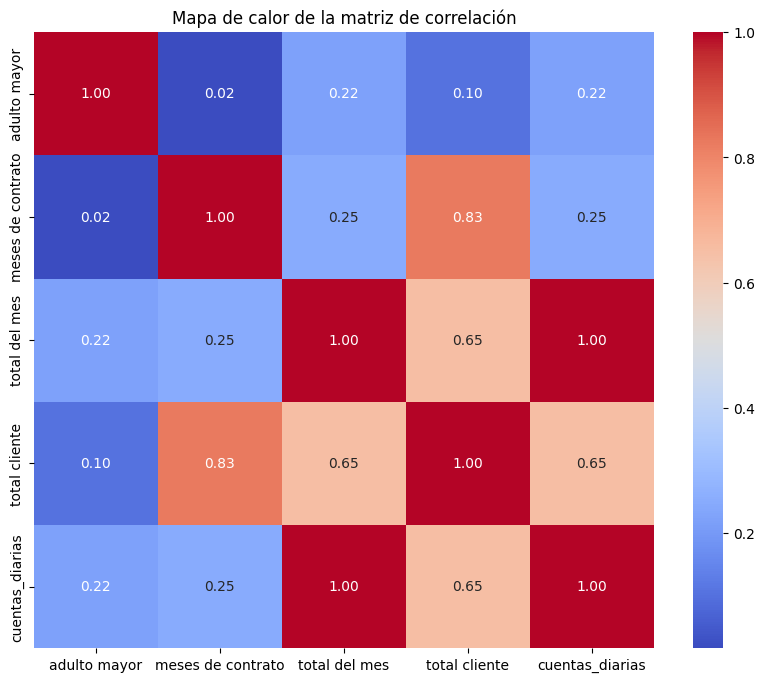

In [191]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de la matriz de correlación')
plt.show()

## Calcular y visualizar la correlación específica entre la cuenta diaria y la evasión.


In [192]:
# Calcular la correlacion entre 'cuentas_diarias' y 'evadio'
correlacion_evasion_diaria = df_normalizado['cuentas_diarias'].corr(df_normalizado['evadio'].replace({'Si': 1, 'No': 0}))
print(f"Correlación entre Cuentas Diarias y Evasión: {correlacion_evasion_diaria:.2f}")

# vizualizar la relacion entre  'cuentas_diarias' y 'total del mes' por 'evadio'
fig = px.scatter(df_normalizado,
                 x='cuentas_diarias',
                 y='total del mes',
                 color='evadio',
                 title='Cuentas Diarias vs Total del Mes por Estado de Evasión')
fig.update_layout(title_x=0.5)
fig.show()

Correlación entre Cuentas Diarias y Evasión: 0.19


## Crear una columna para la cantidad de servicios


Contar el número de servicios contratados por cada cliente y almacenar el resultado en una nueva columna.


In [162]:
# Define una lista de columnas que representan los servicios
columnas_servicios = ['servicio telefonico', 'multilineas', 'servicio internet',
                   'seguridad en linea', 'respaldo en linea', 'proteccion de dispositivos',
                   'soporte tecnico', 'television por streaming', 'suscripcion peliculas']

# Contar el número de servicios para cada cliente
df_normalizado['cantidad_servicios'] = df_normalizado.apply(
    lambda row: sum(row[col] == 'Si' for col in columnas_servicios), axis=1
)

# ver primeras folas con la nueva columnas
display(df_normalizado[['clienteid'] + columnas_servicios + ['cantidad_servicios']].head())

,clienteid,servicio telefonico,multilineas,servicio internet,seguridad en linea,respaldo en linea,proteccion de dispositivos,soporte tecnico,television por streaming,suscripcion peliculas,cantidad_servicios
0,0002-ORFBO,Si,No,DSL,No,Si,No,Si,Si,No,4
1,0003-MKNFE,Si,Si,DSL,No,No,No,No,No,Si,3
2,0004-TLHLJ,Si,No,Fibra optica,No,No,Si,No,No,No,2
3,0011-IGKFF,Si,No,Fibra optica,No,Si,Si,No,Si,Si,5
4,0013-EXCHZ,Si,No,Fibra optica,No,No,No,Si,Si,No,3


## Analizar la correlación de la cantidad de servicios con la columna 'evadio'

Calcular y visualizar la correlación entre la cantidad de servicios y la evasión.


In [163]:
# 1. calcular la correlacion entre 'cantidad_servicios' y 'evadio'
# convetir 'evadio' en numerico (1 para 'Si', 0 para 'No')
df_normalizado['evadio_numeric'] = df_normalizado['evadio'].replace({'Si': 1, 'No': 0})

correlacion_evasion_servicios = df_normalizado['cantidad_servicios'].corr(df_normalizado['evadio_numeric'])

# 2. muestr ala correlacion calculada
print(f"Correlación entre Cantidad de Servicios y Evasión: {correlacion_evasion_servicios:.2f}")

# 3. Agrupar por 'cantidad_servicios' y 'evadio' para el gráfico de barras
cantidad_evasion_por_servicios = df_normalizado.groupby(['cantidad_servicios', 'evadio']).size().unstack(fill_value=0)

# 4. Calcular la tasa de abandono para cada número de servicios para el gráfico lineal
df_grouped_services = df_normalizado.groupby('cantidad_servicios')['evadio_numeric'].value_counts(normalize=True).unstack(fill_value=0)
df_grouped_services['tasa_de_evasion'] = df_grouped_services[1] * 100 # La tasa de abandono es el porcentaje de 'Si'

print("\nCantidad de clientes por Cantidad de Servicios y Estado de Evasión:")
display(cantidad_evasion_por_servicios)

print("\nTasa de Evasión por Cantidad de Servicios:")
display(df_grouped_services[['tasa_de_evasion']])

Correlación entre Cantidad de Servicios y Evasión: -0.07

Cantidad de clientes por Cantidad de Servicios y Estado de Evasión:


/tmp/ipython-input-537385114.py:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



evadio,No,Si
cantidad_servicios,,
0,45,35
1,1342,359
2,798,390
3,613,352
4,633,289
5,676,232
6,524,152
7,346,49
8,197,11



Tasa de Evasión por Cantidad de Servicios:


evadio_numeric,tasa_de_evasion
cantidad_servicios,
0,43.750000
1,21.105232
2,32.828283
3,36.476684
4,31.344902
5,25.550661
6,22.485207
7,12.405063
8,5.288462


Crear un gráfico de barras para visualizar la cantidad de clientes según la cantidad de servicios y el estado de abandono, y luego crear un gráfico lineal para visualizar la tasa de abandono según la cantidad de servicios.



In [160]:
# 3. Cree un gráfico de barras que muestre la cantidad de clientes por número de servicios y estado de abandono.
fig_bar = px.bar(cantidad_evasion_por_servicios.reset_index(),
                 x='cantidad_servicios',
                 y=['No', 'Si'],
                 title='Cantidad de Clientes por Cantidad de Servicios y Estado de Evasión',
                 labels={'value': 'Cantidad de Clientes', 'variable': 'Estado de Evasión'},
                 barmode='group')
fig_bar.update_layout(title_x=0.5)
fig_bar.show()

# 4. Cree un gráfico de líneas que muestre la tasa de abandono por número de servicios
fig_line = px.line(df_grouped_services.reset_index(),
                   x='cantidad_servicios',
                   y='tasa_de_evasion',
                   markers=True,
                   title='Tasa de Evasión (%) por Cantidad de Servicios',
                   labels={'tasa_de_evasion': 'Tasa de Evasión (%)'})
fig_line.update_layout(title_x=0.5)
fig_line.show()

## Resumen de los Hallazgos de Correlación

### Interpretación de la Matriz de Correlación

La matriz de correlación nos muestra la fuerza y dirección de la relación lineal entre pares de variables numéricas. Los valores varían de -1 a +1:

*   **+1:** Indica una correlación positiva perfecta (a medida que una variable aumenta, la otra también lo hace).
*   **-1:** Indica una correlación negativa perfecta (a medida que una variable aumenta, la otra disminuye).
*   **0:** Indica que no hay correlación lineal.

Observando el mapa de calor de la matriz de correlación, podemos identificar las relaciones más fuertes:

*   Existe una correlación positiva fuerte entre `meses de contrato` y `total cliente` (aproximadamente 0.83). Esto es esperable, ya que los clientes con más tiempo en la empresa tienden a acumular un mayor gasto total.
*   También hay una correlación positiva moderada entre `total del mes` y `total cliente` (aproximadamente 0.65), así como entre `total del mes` y `cuentas_diarias` (1.00, ya que `cuentas_diarias` se deriva directamente de `total del mes`).
*   La correlación entre `adulto mayor` y las otras variables numéricas es relativamente baja, lo que sugiere que la edad por sí sola tiene una relación lineal débil con el tiempo de contrato o los cargos.

### Correlación entre Cuenta Diaria y Evasión

Calculamos una correlación de aproximadamente **0.19** entre `cuentas_diarias` y `evadio` (donde 'Si' es 1 y 'No' es 0).

*   Una correlación de 0.19 es una correlación positiva **débil**. Esto sugiere que hay una ligera tendencia a que los clientes con cargos diarios más altos tengan una mayor probabilidad de evadir, pero la relación no es fuerte.
*   El gráfico de dispersión de `cuentas_diarias` vs `total del mes` coloreado por `evadio` también apoya esta interpretación. Aunque hay una superposición significativa, se puede observar una concentración ligeramente mayor de puntos "Si" (evasión) en los rangos más altos de `cuentas_diarias` y `total del mes`.

### Correlación entre Cantidad de Servicios y Evasión

Calculamos una correlación de aproximadamente **-0.07** entre `cantidad_servicios` y `evadio`.

*   Una correlación de -0.07 es una correlación negativa **muy débil**, cercana a cero. Esto indica que no hay una relación lineal significativa entre la cantidad de servicios que un cliente tiene contratado y su probabilidad de evadir, basándonos únicamente en esta medida de correlación.
*   El gráfico de barras y el gráfico de líneas de la tasa de evasión por cantidad de servicios nos dan una imagen más detallada. Aunque la correlación lineal general es muy débil, los gráficos muestran que los clientes con 0 servicios tienen una tasa de evasión relativamente alta, y la tasa de evasión tiende a disminuir ligeramente a medida que aumenta la cantidad de servicios, especialmente para aquellos con 7 u 8 servicios. Esto sugiere que, si bien no hay una fuerte relación lineal, tener muy pocos o muchos servicios puede tener alguna influencia en la evasión.

En resumen, mientras que las variables de cargos (`total del mes`, `total cliente`, `cuentas_diarias`) muestran algunas correlaciones con la evasión, la relación lineal directa no es muy fuerte. La cantidad de servicios, según la correlación lineal, parece tener una relación aún más débil con la evasión. Sin embargo, las visualizaciones más detalladas (como el histograma de meses de contrato y los gráficos de barras/líneas por servicios) revelan patrones más complejos que una simple correlación lineal no capta completamente, como la mayor evasión en los primeros meses y la influencia de servicios específicos como la Fibra Óptica.

# 📄 Informe Final del Análisis de Evasión de Clientes - Telecom X

## 1. Introducción

Telecom X, una empresa líder en el sector de las telecomunicaciones, se enfrenta a un desafío significativo: una alta tasa de evasión de clientes (churn). La pérdida de clientes no solo impacta los ingresos, sino que también afecta la estabilidad y el crecimiento a largo plazo de la empresa. Para abordar este problema, se ha llevado a cabo un análisis exhaustivo de los datos de los clientes con el objetivo de comprender los factores subyacentes que impulsan la evasión. Este informe detalla el proceso de análisis, los hallazgos clave y las recomendaciones estratégicas para ayudar a Telecom X a retener a sus clientes valiosos y reducir la tasa de abandono.

## 2. Limpieza y Tratamiento de Datos

La fase inicial del análisis implicó la importación y preparación del conjunto de datos. Los datos fueron obtenidos de una fuente JSON y cargados en un DataFrame de pandas para su manipulación.

Los pasos clave realizados durante la limpieza y el tratamiento de los datos incluyeron:

*   **Normalización del JSON:** Se utilizó `pd.json_normalize()` para aplanar la estructura anidada del JSON y convertirla en un DataFrame tabular.
*   **Exploración Inicial:** Se verificaron los tipos de datos (`df_normalizado.info()`) y se identificaron valores únicos en cada columna para comprender la naturaleza de las variables.
*   **Manejo de Valores Vacíos y Nulos:** Se identificaron y trataron los valores en blanco o vacíos, particularmente en las columnas 'Churn' y 'account.Charges.Total'. Las filas con valores vacíos en 'Churn' fueron eliminadas debido a su bajo porcentaje en comparación con el tamaño total del dataset. Los valores en blanco en 'account.Charges.Total' se convirtieron a nulos durante la transformación a tipo numérico y se manejaron posteriormente.
*   **Transformación de Tipos de Datos:** La columna 'account.Charges.Total' fue convertida a un tipo numérico (float) utilizando `pd.to_numeric` con `errors='coerce'` para manejar posibles valores no numéricos.
*   **Creación de Nuevas Variables:** Se creó la columna 'Cuentas_Diarias' calculando el cargo diario a partir del cargo mensual.
*   **Normalización de Nombres y Valores:** Se renombraron las columnas a español y se convirtieron a minúsculas para mayor claridad. Se tradujeron los valores categóricos relevantes al español (por ejemplo, 'Male' a 'Hombre', 'Yes' a 'Si').
*   **Reseteo del Índice:** Se reseteó el índice del DataFrame después de eliminar filas para asegurar una indexación continua.

Estos pasos de limpieza y preprocesamiento aseguraron que los datos estuvieran en un formato adecuado para el análisis exploratorio.

## 3. Análisis Exploratorio de Datos

En esta sección, presentamos los análisis exploratorios realizados para identificar patrones y relaciones entre las variables del conjunto de datos y el estado de evasión de los clientes. Se utilizaron diversas visualizaciones para ilustrar los hallazgos.

### 3.1 Distribución General de Clientes por Estado de Evasión

Comenzamos examinando la proporción general de clientes que han evadido la empresa.

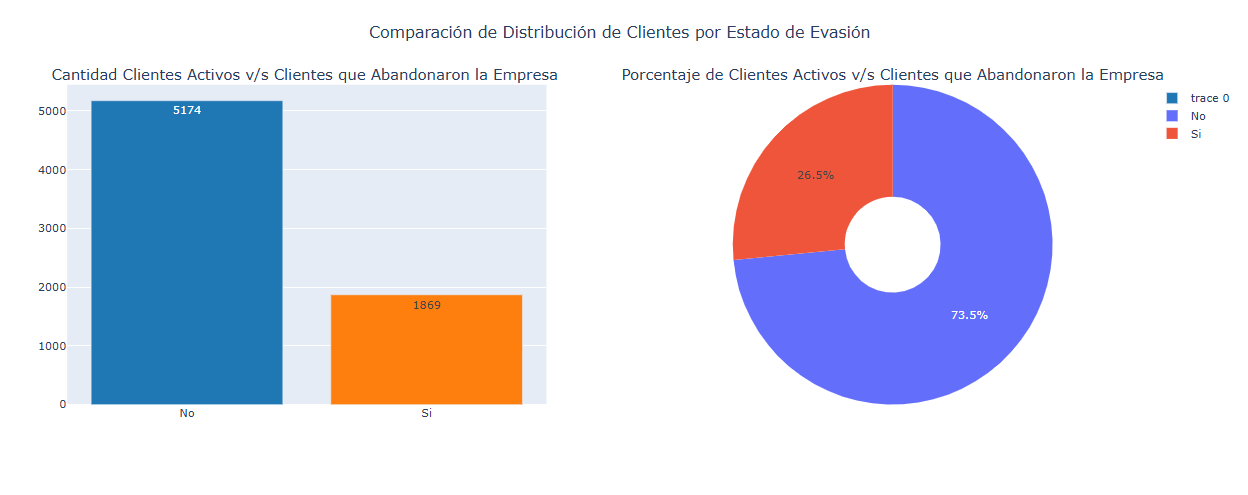

### 3.2 Análisis de Evasión por Género

Analizamos la distribución de la evasión entre clientes masculinos y femeninos para determinar si existe alguna diferencia significativa basada en el género.

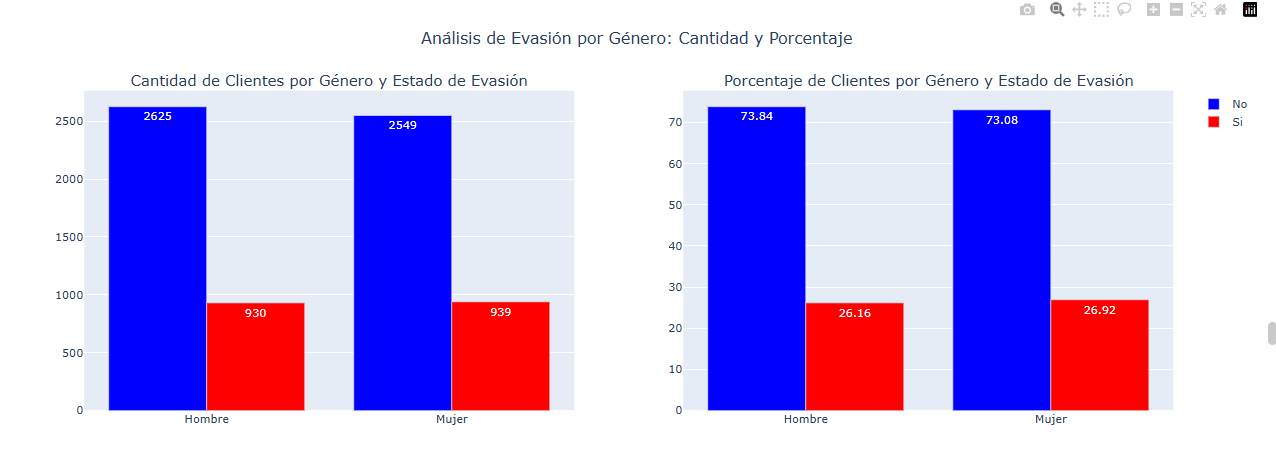

### 3.3 Análisis de Evasión por Edad (Adulto Mayor)

Aquí comparamos la tasa de evasión entre los clientes que son adultos mayores de 65 años y aquellos que no lo son.

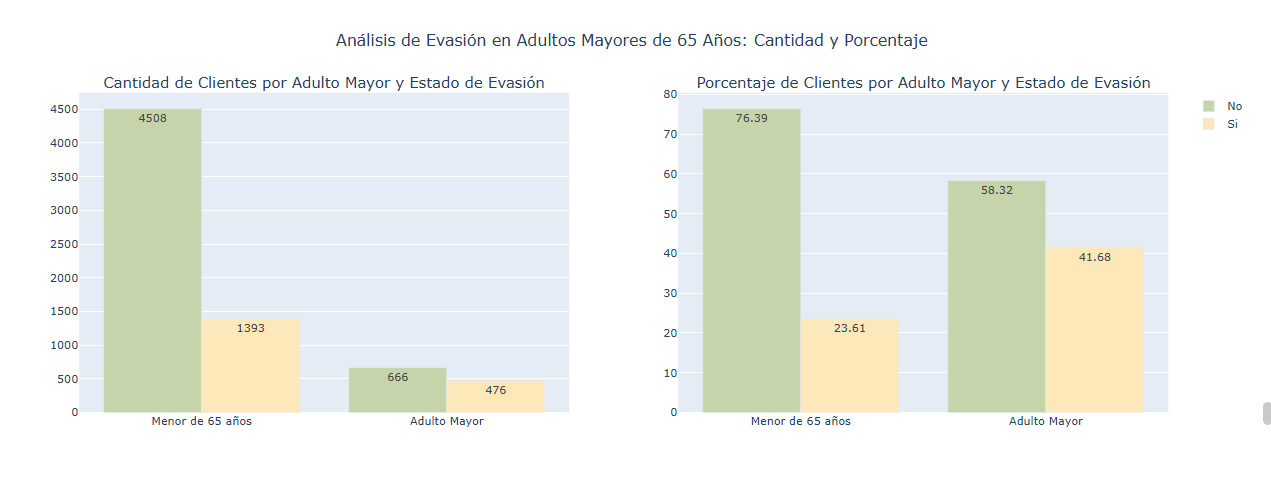

### 3.4 Análisis de Evasión por Relación (Pareja y Dependientes)

Exploramos si tener pareja o dependientes influye en la tasa de evasión de los clientes.

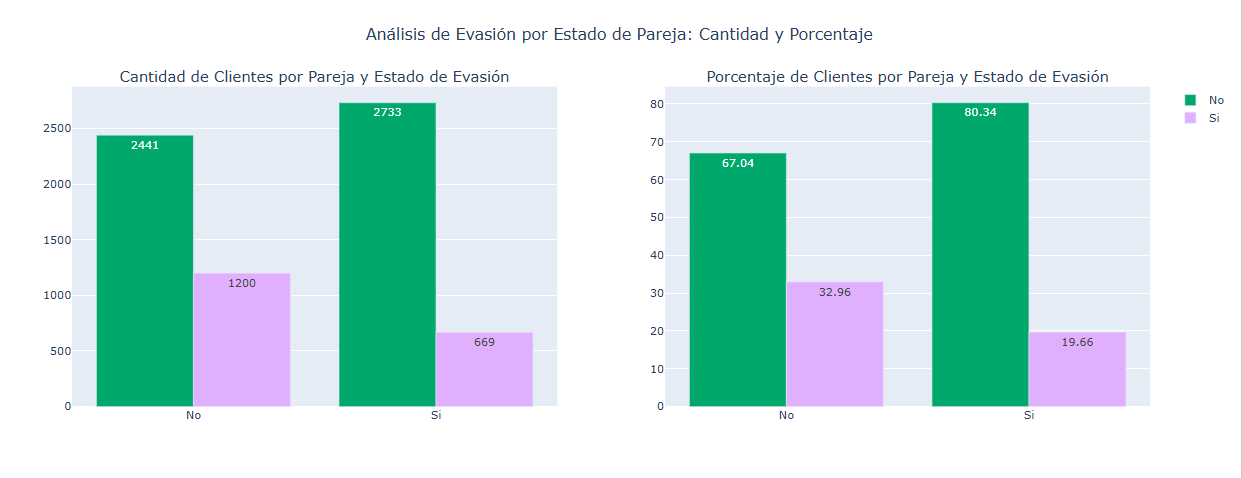

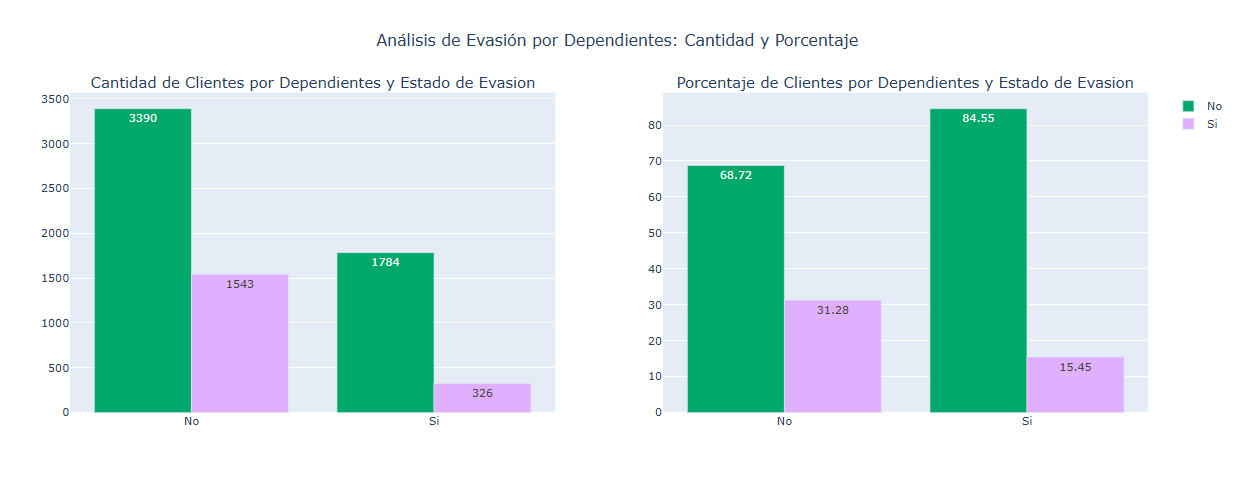

### 3.5 Análisis de Evasión por Antigüedad (Meses de Contrato)

Aquí exploramos cómo la duración del contrato de un cliente se relaciona con la probabilidad de que abandone la empresa.

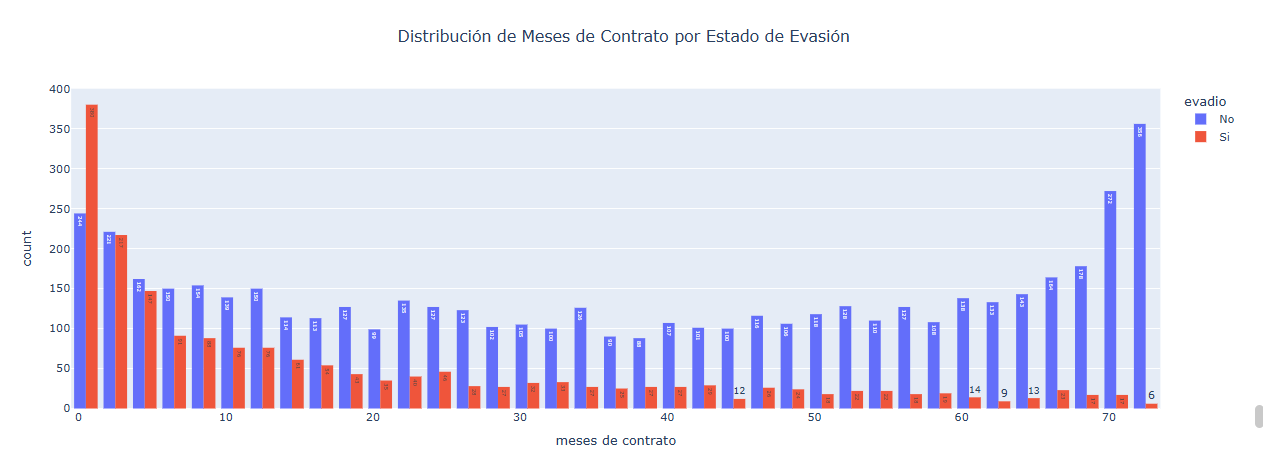

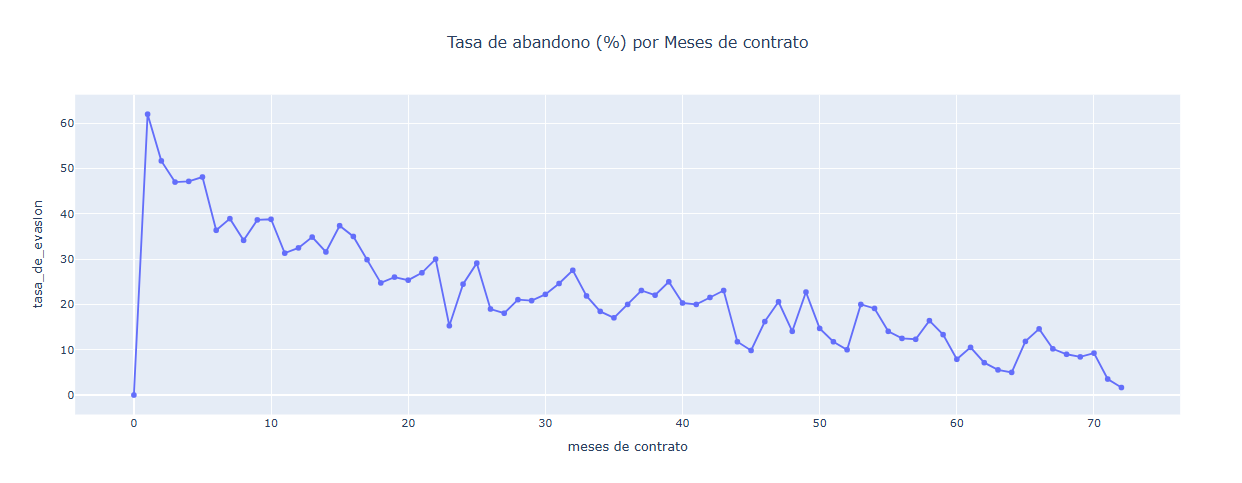

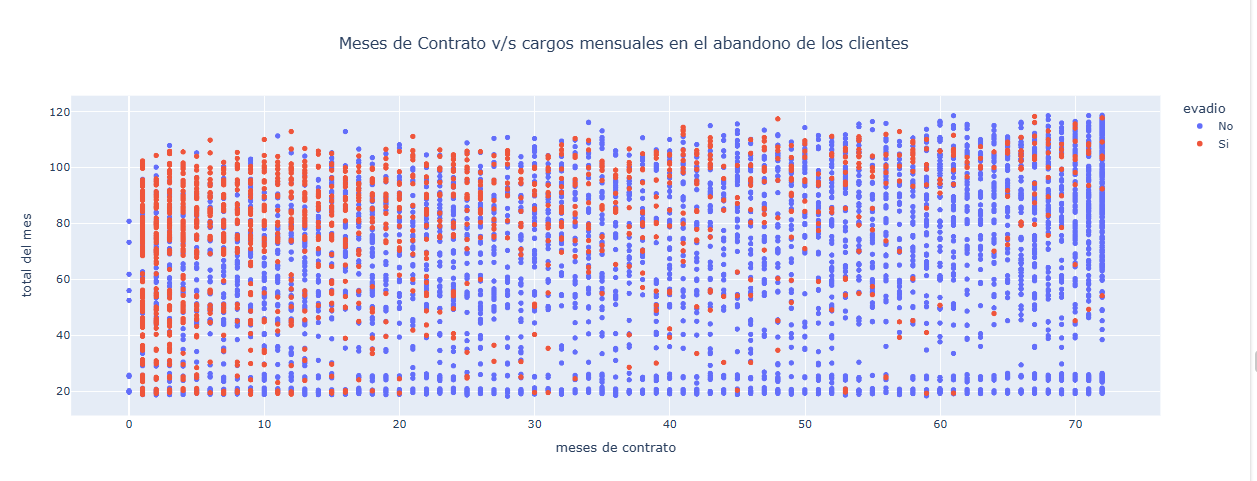

### 3.6 Análisis de Evasión por Servicios Contratados

Exploramos la tasa de evasión para los diferentes servicios a los que están suscritos los clientes.

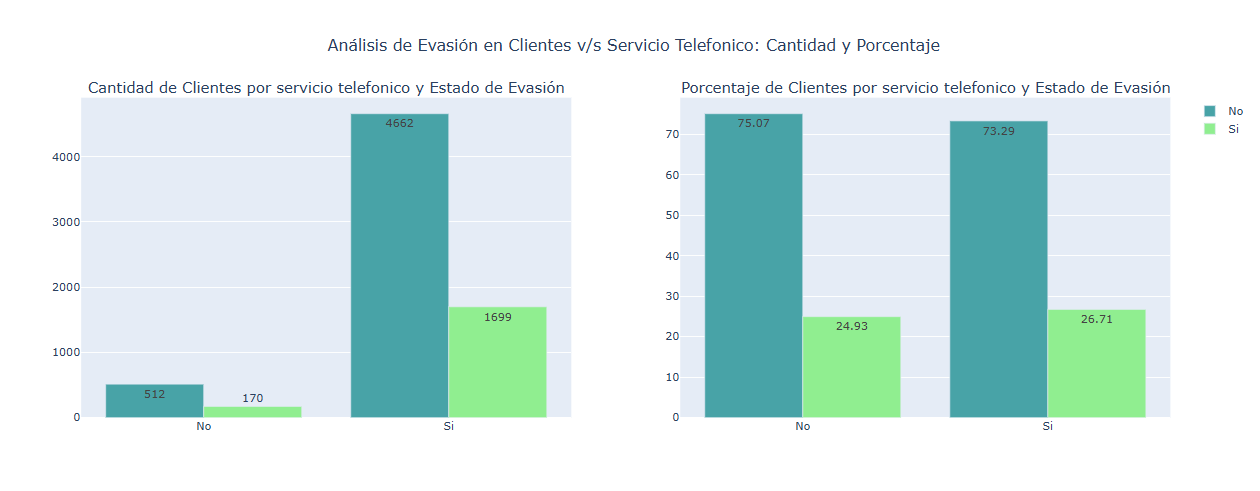

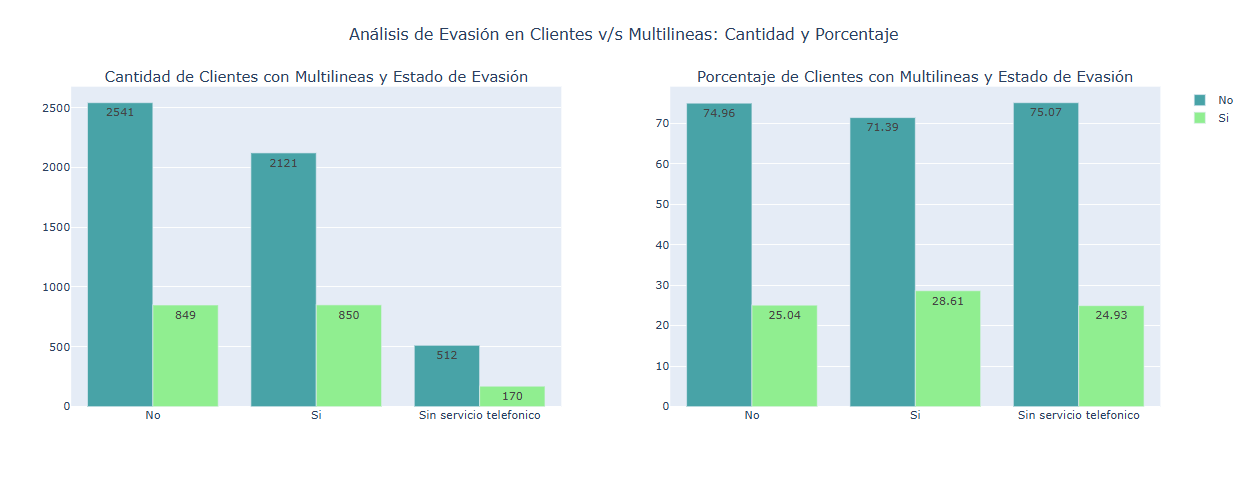

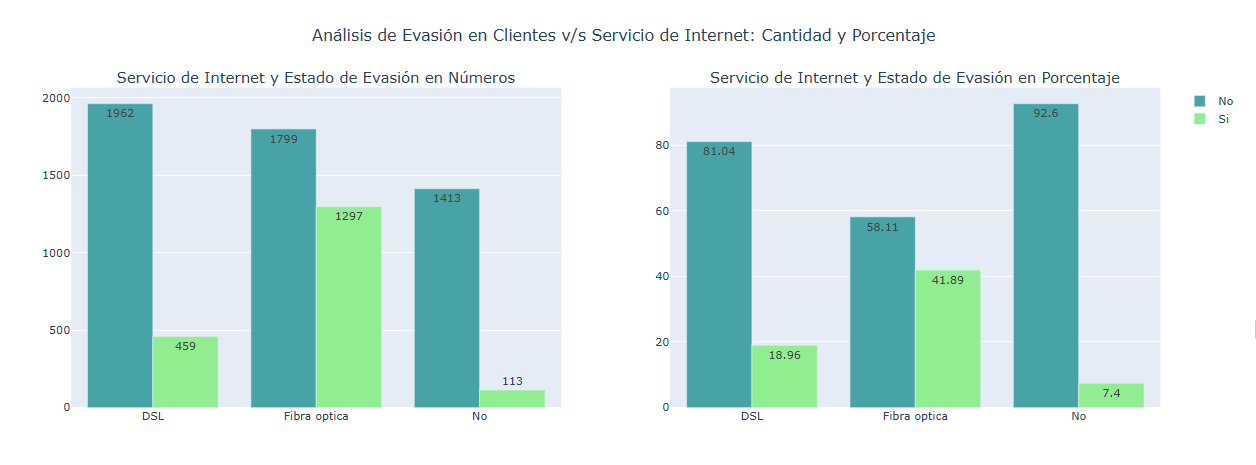

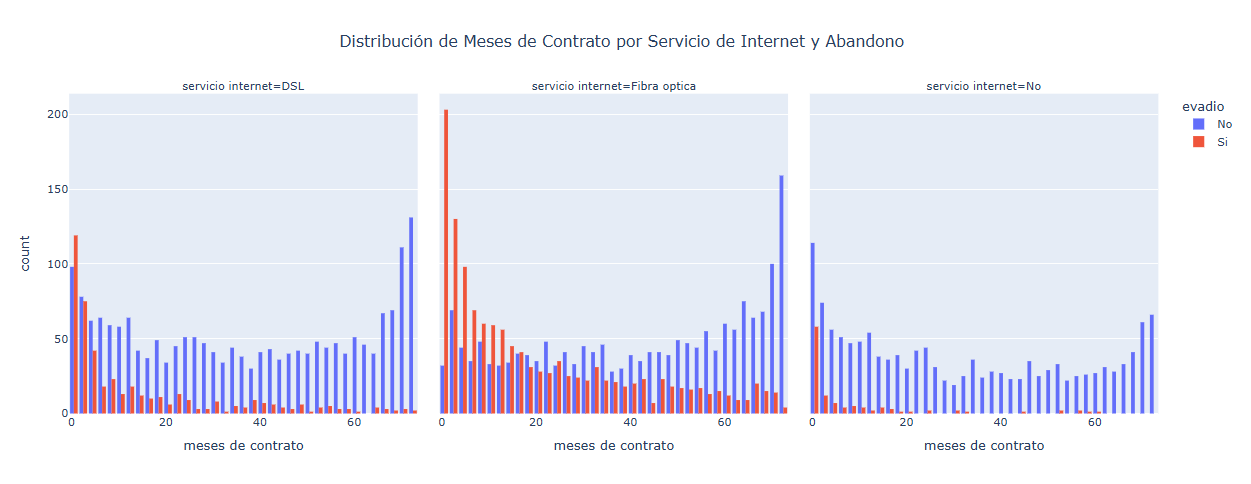

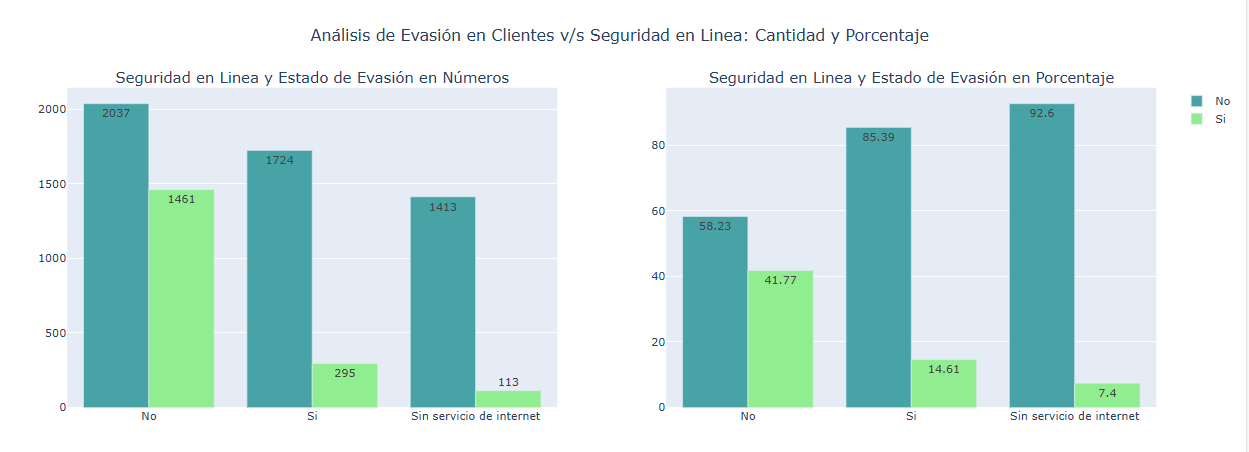

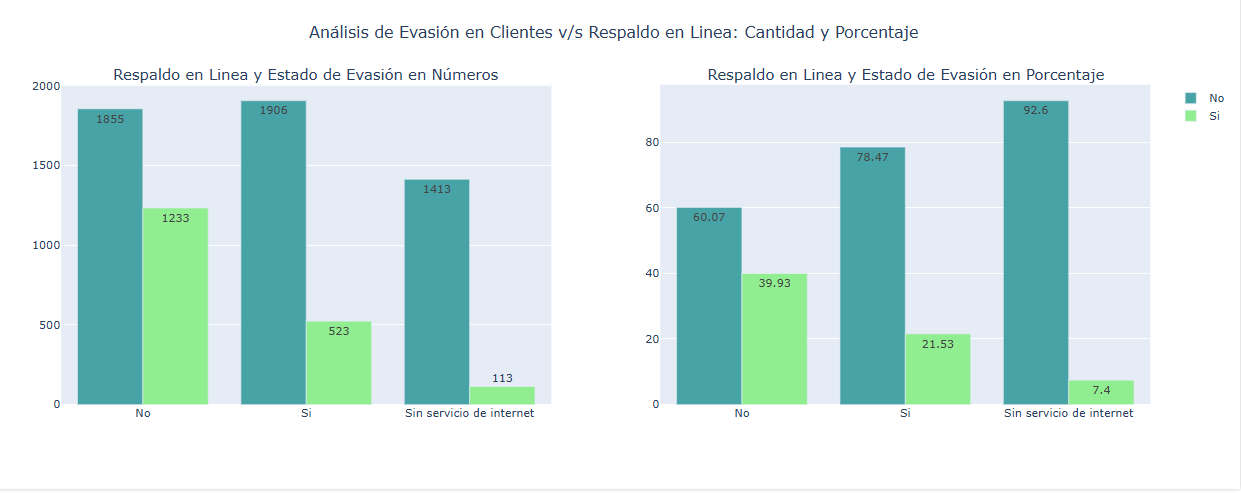

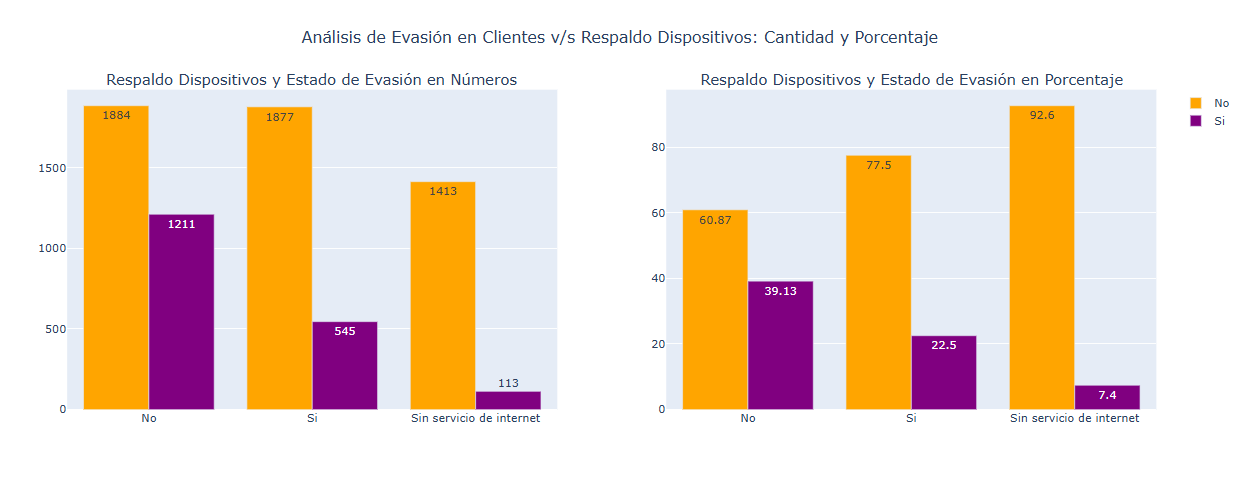

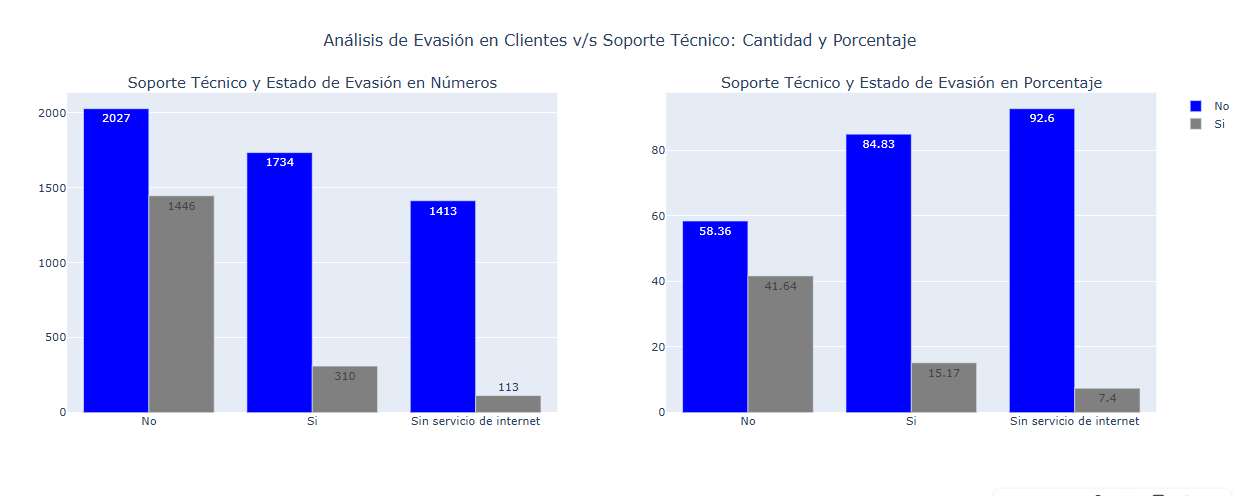

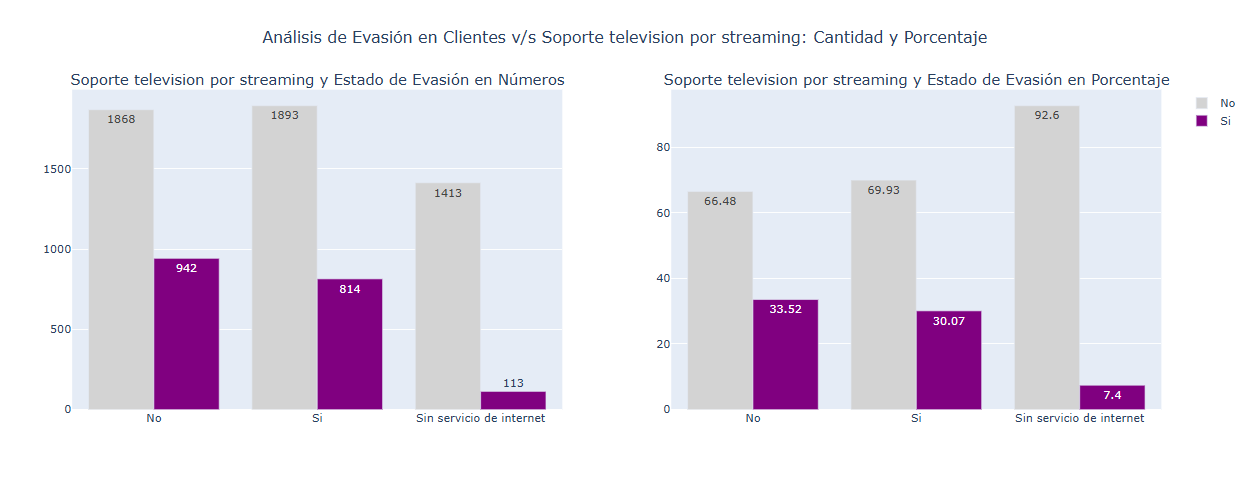

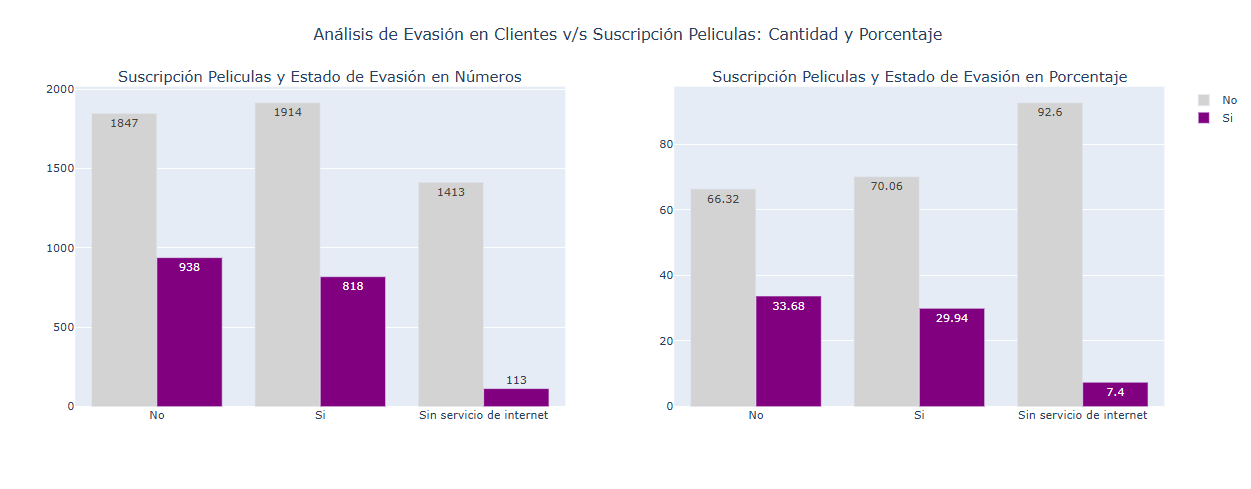

### 3.7 Análisis de evasión por tipo de contrato:

La tasa de evasión entre los diferentes tipos de contrato.

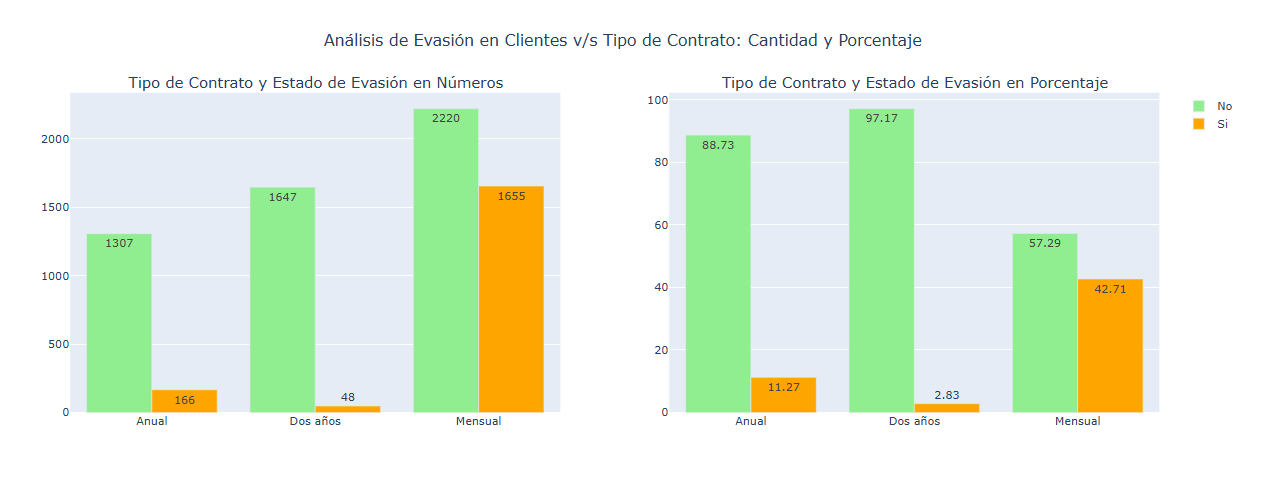

### 3.8 Análisis de evasión por cargos:

Visualizar la relación entre los cargos mensuales y totales y la evasión.

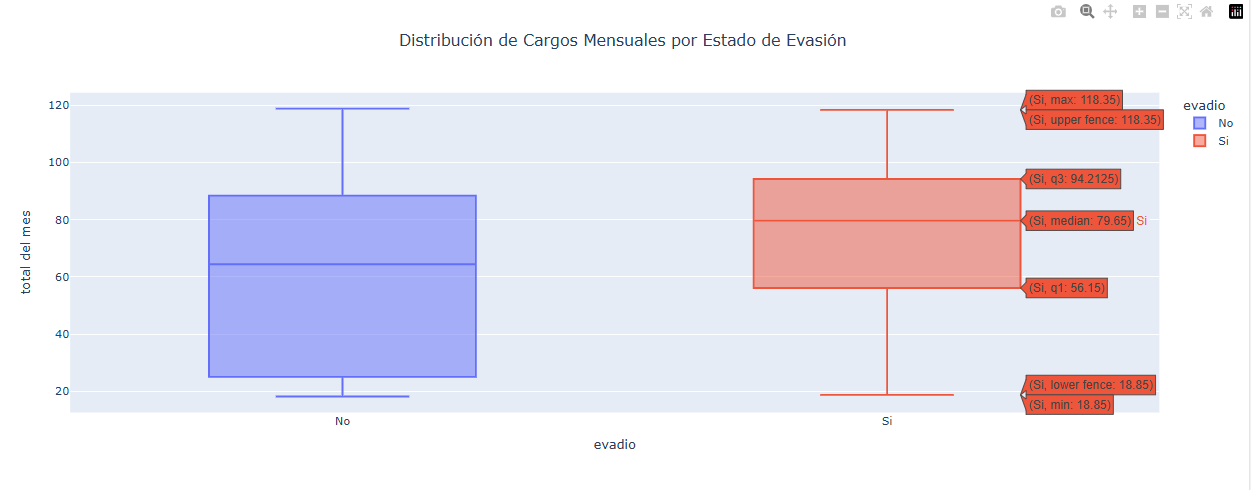

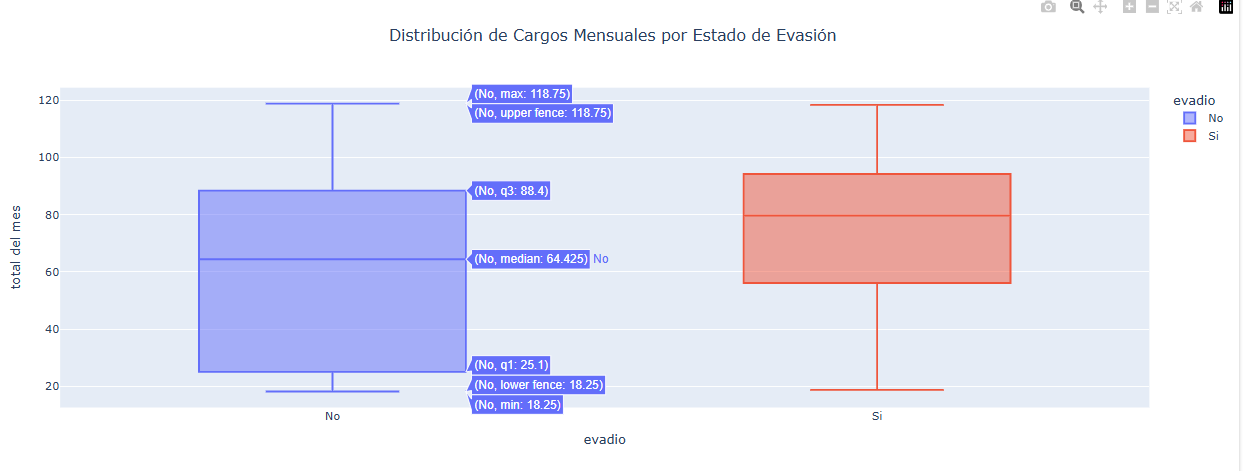

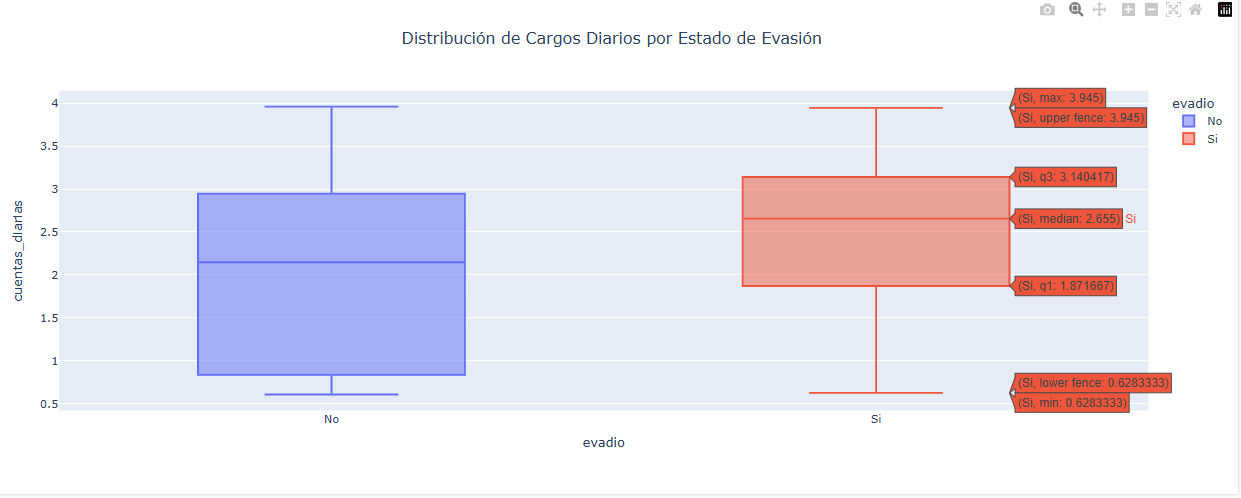

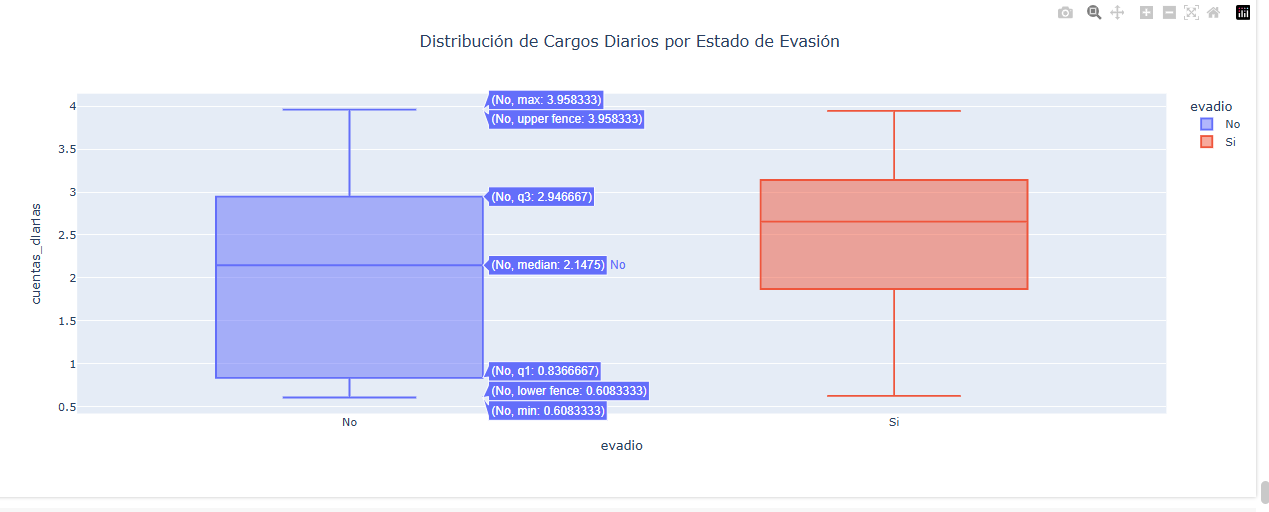

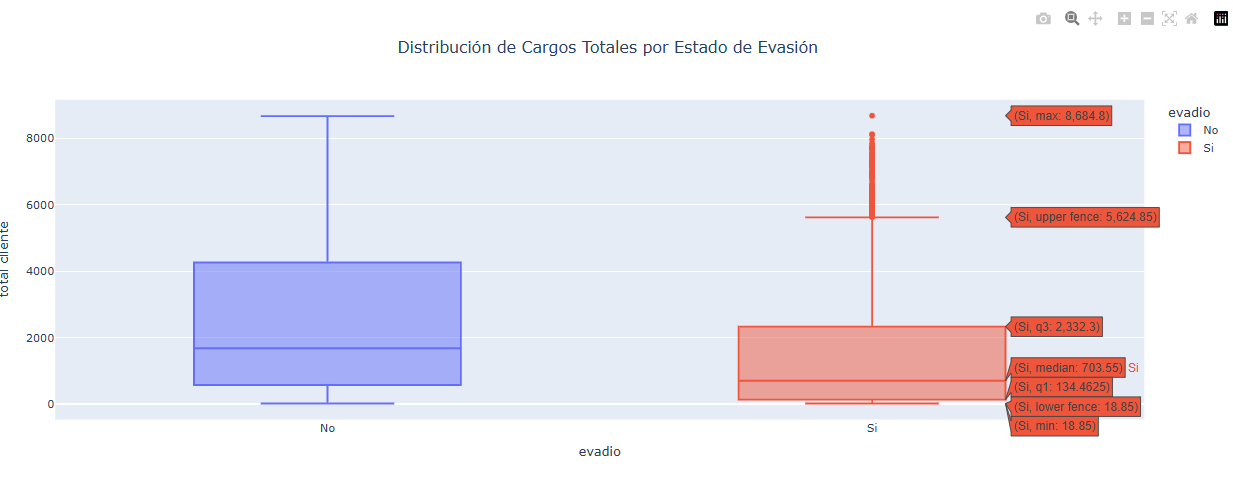

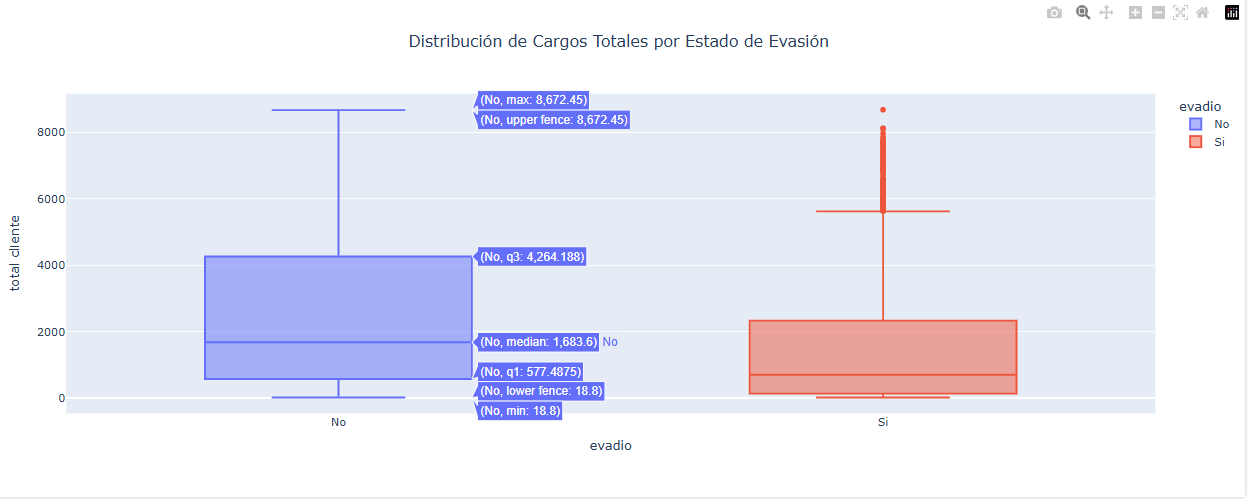

### 3.9 Análisis de Evasión por Factura Online y Método de Pago

Finalmente, examinamos si el método de recepción de factura (online o no) y el método de pago están relacionados con la evasión.

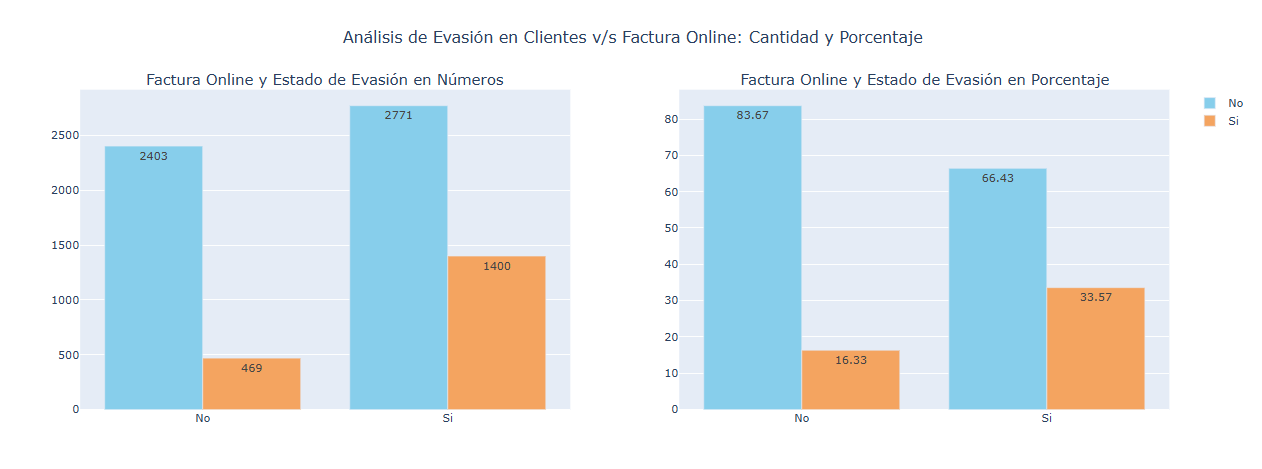

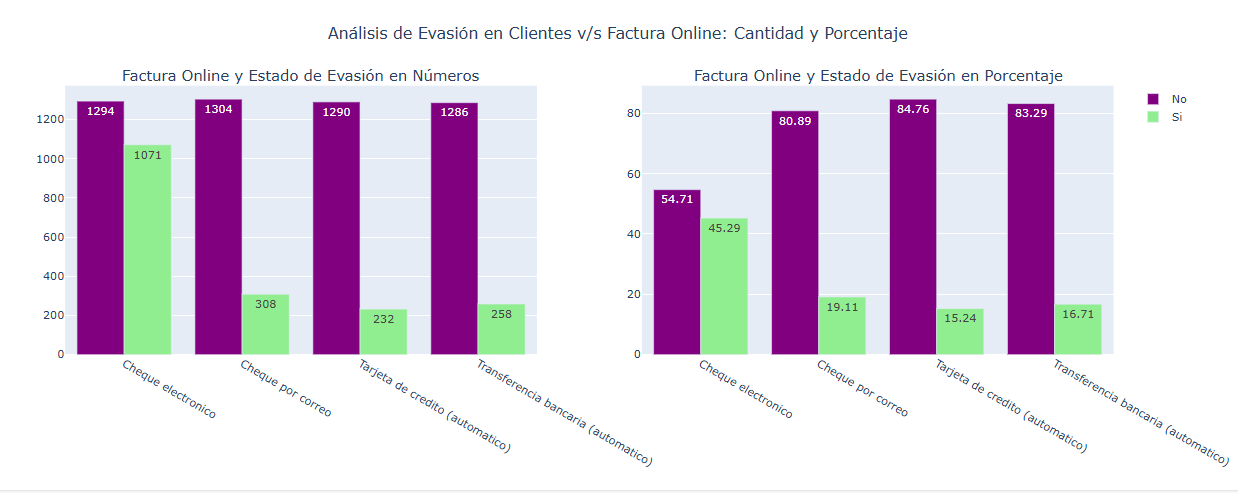

## 4. Conclusiones e Insights

Basado en el análisis exploratorio de datos, se identificaron varios factores clave asociados con la evasión de clientes en Telecom X:

*   **Antigüedad del Cliente:** Los clientes nuevos (con pocos meses de contrato) tienen una probabilidad significativamente mayor de evadir. La tasa de evasión disminuye drásticamente a medida que aumenta la antigüedad.
*   **Servicio de Internet (Fibra Óptica):** Los clientes suscritos al servicio de Fibra Óptica presentan una tasa de evasión considerablemente más alta en comparación con aquellos con servicio DSL o sin servicio de internet. Esto podría estar relacionado con el costo, la calidad del servicio o las expectativas del cliente.
*   **Servicios Adicionales:** Los clientes que no tienen servicios adicionales (seguridad en línea, respaldo, protección de dispositivos, soporte técnico, streaming de TV y películas) tienden a evadir más. Esto sugiere que la adopción de servicios adicionales puede estar relacionada con una mayor lealtad o satisfacción.
*   **Tipo de Contrato:** Los contratos mes a mes están fuertemente asociados con una mayor tasa de evasión, lo que indica que los clientes con menor compromiso a largo plazo son más propensos a irse.
*   **Cargos (Mensuales y Totales):** Existe una tendencia a que los clientes con cargos mensuales y totales más altos tengan una mayor probabilidad de evasión. Esto podría estar vinculado al costo percibido del servicio, especialmente para los servicios de mayor precio como la Fibra Óptica.
*   **Método de Pago (Cheque Electrónico):** El uso del cheque electrónico como método de pago se asocia con una tasa de evasión más alta.
*   **Adulto Mayor:** Los clientes que son adultos mayores de 65 años también muestran una mayor tasa de evasión.

Estos insights sugieren que la evasión en Telecom X es un fenómeno complejo influenciado por una combinación de factores demográficos, de servicios y de facturación. La mayor vulnerabilidad se observa en clientes nuevos, aquellos con servicios de alta velocidad como Fibra Óptica, y aquellos con contratos flexibles o que utilizan métodos de pago específicos.

Comprender estos patrones es fundamental para desarrollar estrategias de retención dirigidas y efectivas que aborden las causas raíz de la evasión.

## 5. Recomendaciones

Con base en los hallazgos del análisis exploratorio, se proponen las siguientes recomendaciones estratégicas para ayudar a Telecom X a reducir la evasión de clientes:

*   **Programas de Incorporación y Retención Temprana:** Implementar programas de bienvenida proactivos y estrategias de retención dirigidas a los clientes en sus primeros meses de contrato. Esto podría incluir comunicación frecuente, soporte técnico prioritario y ofertas especiales después del primer mes.
*   **Optimización de la Oferta de Fibra Óptica:** Realizar una investigación más profunda sobre la experiencia del cliente con la Fibra Óptica. Evaluar la relación precio-valor, la estabilidad del servicio y la comunicación de beneficios para reducir la tasa de evasión en este segmento. Considerar programas de fidelización específicos para usuarios de Fibra Óptica.
*   **Incentivar la Adopción de Contratos a Largo Plazo:** Ofrecer descuentos significativos o beneficios adicionales a los clientes que opten por contratos de uno o dos años en lugar de contratos mes a mes. Comunicar claramente los beneficios de la estabilidad del servicio y los ahorros a largo plazo.
*   **Promoción de Servicios Adicionales:** Destacar el valor y los beneficios de los servicios adicionales (seguridad, respaldo, soporte técnico, streaming) para fomentar su adopción. Los clientes con más servicios tienden a tener una menor tasa de evasión, lo que sugiere que una oferta de servicios más completa puede aumentar la lealtad.
*   **Revisión del Proceso de Pago con Cheque Electrónico:** Investigar posibles puntos de fricción o insatisfacción asociados con el método de pago de cheque electrónico. Simplificar el proceso o promover métodos de pago alternativos más estables podría ayudar a reducir la evasión en este grupo.
*   **Estrategias de Retención para Adultos Mayores:** Desarrollar programas o servicios adaptados a las necesidades de los clientes adultos mayores, considerando posibles barreras tecnológicas o preferencias de comunicación.
*   **Análisis de Precios Competitivos:** Evaluar si los cargos mensuales y totales son competitivos en el mercado, especialmente para los servicios de alta velocidad. Un análisis de precios podría ayudar a identificar si el costo es un factor determinante en la decisión de evadir.

Estas recomendaciones buscan abordar los factores identificados como influyentes en la evasión de clientes y proporcionar un punto de partida para la implementación de estrategias de retención más efectivas en Telecom X.